In [1]:
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import torch.nn as nn
from skorch import NeuralNetBinaryClassifier
import torch
import torch.nn.functional as F
from sklearn.model_selection import GridSearchCV
torch.__version__

'1.9.1+cpu'

In [3]:
np.random.seed(123)
torch.manual_seed(123)

In [4]:
previsores = pd.read_csv('entradas_breast.csv')
classe = pd.read_csv('saidas_breast.csv')

In [5]:
classe.shape

(569, 1)

C:\Users\jason\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


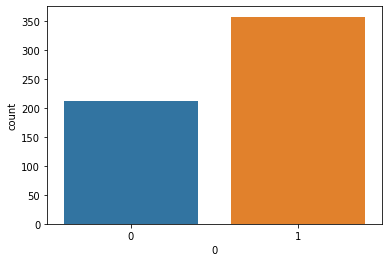

In [6]:
sns.countplot(classe['0']);

In [7]:
previsores = np.array(previsores, dtype='float32')
classe = np.array(classe, dtype='float32').squeeze(1)

In [8]:
classe.shape

(569,)

In [9]:
type(previsores)

numpy.ndarray

In [36]:
class classificador_torch(nn.Module):
    def __init__(self, activation, neurons, initializer):
        super().__init__()
        self.dense0 = nn.Linear(30, neurons)
        initializer(self.dense0.weight)
        self.activation0 = activation
        self.dense1 = nn.Linear(neurons, neurons)
        initializer(self.dense1.weight)
        self.activation1 = activation
        self.dense2 = nn.Linear(neurons, 1)
        initializer(self.dense2.weight)
        self.output = nn.Sigmoid()
        
    def forward(self, X):
        X = self.dense0(X)
        X = self.activation0(X)
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.dense2(X)
        X = self.output(X)
        return X

In [37]:
classificador_sklearn = NeuralNetBinaryClassifier(module = classificador_torch,
                                                 lr = 0.001,
                                                 optimizer__weight_decay = 0.0001,
                                                 train_split=False)

In [44]:
#Definindo parametros para que o computador encontre o melhor conjunto de parametros para definir a estrutura da rede neural
#ao invés de ficarmos alterando manualmente procurando o melhor resultado.
params = {'batch_size': [10],
         'max_epochs': [100],
         'optimizer': [torch.optim.Adam, torch.optim.SGD],
         'criterion': [torch.nn.BCELoss, torch.nn.HingeEmbeddingLoss],
         'module__activation': [F.relu, F.tanh],
         'module__neurons': [8,16],
         'module__initializer': [torch.nn.init.uniform_, torch.nn.init.normal_]}

In [45]:
grid_search = GridSearchCV(estimator=classificador_sklearn, param_grid=params, scoring='accuracy', cv=5)

In [46]:
grid_search = grid_search.fit(previsores, classe)

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1429  0.0410
      2       37.1429  0.0410
      3       37.1429  0.0390
      4       37.1429  0.0390
      5       37.1429  0.0400
      6       37.1429  0.0430
      7       37.1429  0.0400
      8       37.1429  0.0400
      9       37.1429  0.0410
     10       37.1429  0.0400
     11       37.1429  0.0400
     12       37.1429  0.0400
     13       37.1429  0.0400
     14       37.1429  0.0410
     15       37.1429  0.0400
     16       37.1429  0.0390
     17       37.1429  0.0420
     18       37.1429  0.0400
     19       37.1429  0.0390
     20       37.1429  0.0400
     21       37.1429  0.0400
     22       27.7222  0.0390
     23        0.5138  0.0400
     24        0.4695  0.0390
     25        0.4867  0.0430
     26        0.4507  0.0420
     27        0.5292  0.0400
     28        0.5367  0.0400
     29        0.4636  0.0410
     30        0.4549  0.0400
     31        0.4534  0.0400
     32   

     28        0.4715  0.0401
     29        0.4572  0.0391
     30        0.4397  0.0411
     31        0.4310  0.0406
     32        0.4176  0.0431
     33        0.4061  0.0406
     34        0.3971  0.0401
     35        0.3848  0.0421
     36        0.3785  0.0406
     37        0.3654  0.0411
     38        0.3600  0.0406
     39        0.3596  0.0401
     40        0.3454  0.0401
     41        0.3465  0.0401
     42        0.3443  0.0401
     43        0.3218  0.0401
     44        0.3210  0.0411
     45        0.3140  0.0416
     46        0.3076  0.0441
     47        0.3026  0.0446
     48        0.2983  0.0431
     49        0.2953  0.0476
     50        0.2847  0.0461
     51        0.2705  0.0451
     52        0.2723  0.0461
     53        0.2695  0.0431
     54        0.2699  0.0456
     55        0.2579  0.0446
     56        0.2629  0.0456
     57        0.2613  0.0471
     58        0.2578  0.0431
     59        0.2530  0.0581
     60        0.2509  0.0491
     61   

     61       37.2807  0.0426
     62       37.2807  0.0456
     63       37.2807  0.0411
     64       37.2807  0.0426
     65       37.2807  0.0401
     66       37.2807  0.0426
     67       37.2807  0.0436
     68       37.2807  0.0411
     69       37.2807  0.0416
     70       37.2807  0.0426
     71       37.2807  0.0426
     72       37.2807  0.0421
     73       37.2807  0.0466
     74       37.2807  0.0591
     75       37.2807  0.0722
     76       37.2807  0.0762
     77       37.2807  0.0687
     78       37.2807  0.0456
     79       37.2807  0.0466
     80       37.2807  0.0468
     81       37.2807  0.0456
     82       37.2807  0.0476
     83       37.2807  0.0456
     84       37.2807  0.0431
     85       37.2807  0.0401
     86       37.2807  0.0411
     87       37.2807  0.0416
     88       37.2807  0.0431
     89       37.2807  0.0411
     90       37.2807  0.0411
     91       37.2807  0.0416
     92       37.2807  0.0486
     93       37.2807  0.0416
     94   

     28       37.3626  0.0306
     29       37.3626  0.0305
     30       37.3626  0.0301
     31       37.3626  0.0315
     32       37.3626  0.0295
     33       37.3626  0.0306
     34       37.3626  0.0305
     35       37.3626  0.0295
     36       37.3626  0.0305
     37       37.3626  0.0295
     38       37.3626  0.0305
     39       37.3626  0.0305
     40       37.3626  0.0311
     41       37.3626  0.0295
     42       37.3626  0.0285
     43       37.3626  0.0311
     44       37.3626  0.0295
     45       37.3626  0.0295
     46       37.3626  0.0300
     47       37.3626  0.0305
     48       37.3626  0.0295
     49       37.3626  0.0301
     50       37.3626  0.0306
     51       37.3626  0.0310
     52       37.3626  0.0305
     53       37.3626  0.0300
     54       37.3626  0.0305
     55       37.3626  0.0305
     56       37.3626  0.0310
     57       37.3626  0.0336
     58       37.3626  0.0295
     59       37.3626  0.0321
     60       37.3626  0.0305
     61   

     97       37.2807  0.0295
     98       37.2807  0.0306
     99       37.2807  0.0305
    100       37.2807  0.0315
  epoch    train_loss     dur
-------  ------------  ------
      1       37.1429  0.0401
      2       37.1429  0.0411
      3       37.1429  0.0416
      4       37.1429  0.0411
      5       37.1429  0.0406
      6       37.1429  0.0411
      7       37.1429  0.0401
      8       37.1429  0.0396
      9       37.1429  0.0411
     10       37.1429  0.0428
     11       37.1429  0.0411
     12       37.1429  0.0431
     13       37.1429  0.0411
     14       37.1429  0.0411
     15       37.1429  0.0396
     16       37.1429  0.0401
     17       37.1429  0.0426
     18       37.1429  0.0426
     19       37.1429  0.0401
     20       37.1429  0.0396
     21       37.1429  0.0401
     22       37.1429  0.0406
     23       37.1429  0.0411
     24       37.1429  0.0431
     25       37.1429  0.0390
     26       37.1429  0.0411
     27       37.1429  0.0396
     28   

     38        0.4615  0.0411
     39        0.4516  0.0401
     40        0.4395  0.0401
     41        0.4321  0.0401
     42        0.4222  0.0416
     43        0.4122  0.0401
     44        0.4037  0.0401
     45        0.3944  0.0421
     46        0.3869  0.0401
     47        0.3760  0.0401
     48        0.3652  0.0401
     49        0.3602  0.0401
     50        0.3519  0.0421
     51        0.3384  0.0426
     52        0.3343  0.0401
     53        0.3307  0.0416
     54        0.3177  0.0411
     55        0.3097  0.0401
     56        0.3052  0.0411
     57        0.3028  0.0411
     58        0.3074  0.0416
     59        0.2933  0.0406
     60        0.2830  0.0401
     61        0.2803  0.0396
     62        0.2850  0.0401
     63        0.2757  0.0406
     64        0.2731  0.0401
     65        0.2629  0.0411
     66        0.2620  0.0396
     67        0.2582  0.0401
     68        0.2470  0.0390
     69        0.2456  0.0411
     70        0.2410  0.0411
     71   

     64        0.2912  0.0431
     65        0.2947  0.0456
     66        0.2872  0.0456
     67        0.2855  0.0461
     68        0.2755  0.0481
     69        0.2656  0.0456
     70        0.2863  0.0476
     71        0.2623  0.0456
     72        0.2577  0.0441
     73        0.2569  0.0446
     74        0.2530  0.0436
     75        0.2402  0.0466
     76        0.2418  0.0451
     77        0.2352  0.0441
     78        0.2367  0.0511
     79        0.2275  0.0461
     80        0.2260  0.0441
     81        0.2215  0.0451
     82        0.2204  0.0451
     83        0.2143  0.0431
     84        0.2139  0.0471
     85        0.2177  0.0446
     86        0.2054  0.0411
     87        0.2072  0.0461
     88        0.2028  0.0461
     89        0.2031  0.0732
     90        0.1966  0.0416
     91        0.1957  0.0416
     92        0.1908  0.0401
     93        0.1974  0.0416
     94        0.1873  0.0411
     95        0.1877  0.0431
     96        0.1830  0.0411
     97   

     22       37.3626  0.0305
     23       37.3626  0.0315
     24       37.3626  0.0306
     25       37.3626  0.0311
     26       37.3626  0.0305
     27       37.3626  0.0301
     28       37.3626  0.0305
     29       37.3626  0.0305
     30       37.3626  0.0301
     31       37.3626  0.0306
     32       37.3626  0.0306
     33       37.3626  0.0311
     34       37.3626  0.0306
     35       37.3626  0.0305
     36       37.3626  0.0300
     37       37.3626  0.0315
     38       37.3626  0.0306
     39       37.3626  0.0331
     40       37.3626  0.0315
     41       37.3626  0.0306
     42       37.3626  0.0300
     43       37.3626  0.0305
     44       37.3626  0.0305
     45       37.3626  0.0305
     46       37.3626  0.0301
     47       37.3626  0.0306
     48       37.3626  0.0305
     49       37.3626  0.0316
     50       37.3626  0.0305
     51       37.3626  0.0305
     52       37.3626  0.0311
     53       37.3626  0.0295
     54       37.3626  0.0305
     55   

     91       37.2807  0.0311
     92       37.2807  0.0321
     93       37.2807  0.0316
     94       37.2807  0.0321
     95       37.2807  0.0321
     96       37.2807  0.0336
     97       37.2807  0.0321
     98       37.2807  0.0326
     99       37.2807  0.0326
    100       37.2807  0.0321
  epoch    train_loss     dur
-------  ------------  ------
      1       56.2637  0.0411
      2       56.2637  0.0436
      3       56.2637  0.0486
      4       56.4835  0.0426
      5       56.4835  0.0411
      6       56.7033  0.0411
      7       56.7033  0.0416
      8       56.7033  0.0411
      9       56.7033  0.0416
     10       56.7033  0.0426
     11       56.2658  0.0426
     12       56.2637  0.0411
     13       55.8465  0.0421
     14       55.8242  0.0416
     15       55.8242  0.0441
     16       55.8242  0.0421
     17       55.8242  0.0421
     18       55.8242  0.0406
     19       55.8242  0.0421
     20       55.8242  0.0426
     21       55.8242  0.0416
     22   

     25       37.3626  0.0406
     26       37.3626  0.0401
     27       37.3626  0.0401
     28       37.3626  0.0396
     29       37.3626  0.0401
     30       37.3626  0.0431
     31       37.3626  0.0391
     32       37.3626  0.0391
     33       37.3626  0.0406
     34       37.3626  0.0401
     35       37.3626  0.0416
     36       37.3626  0.0401
     37       37.3626  0.0406
     38       37.3626  0.0411
     39       37.3626  0.0401
     40       37.3626  0.0411
     41       37.3626  0.0411
     42       37.3626  0.0426
     43       37.3626  0.0431
     44       37.3626  0.0401
     45       37.3626  0.0406
     46       37.3626  0.0401
     47       37.3626  0.0406
     48       37.3626  0.0391
     49       37.3626  0.0406
     50       37.3626  0.0401
     51       37.3626  0.0401
     52       37.3626  0.0401
     53       37.3626  0.0401
     54       37.3626  0.0431
     55       37.3626  0.0411
     56       37.3626  0.0408
     57       37.3626  0.0396
     58   

     77        3.1814  0.0406
     78        3.1825  0.0411
     79        3.1817  0.0401
     80        3.1829  0.0406
     81        3.1818  0.0401
     82        3.1814  0.0416
     83        3.1815  0.0411
     84        3.1813  0.0406
     85        3.1812  0.0431
     86        3.1811  0.0411
     87        3.1813  0.0406
     88        3.1818  0.0401
     89        3.1814  0.0411
     90        3.1812  0.0408
     91        3.1812  0.0411
     92        3.1811  0.0396
     93        3.1828  0.0401
     94        3.1812  0.0406
     95        3.1818  0.0401
     96        3.1812  0.0421
     97        3.1810  0.0401
     98        3.1810  0.0401
     99        3.1809  0.0406
    100        3.1809  0.0411
  epoch    train_loss     dur
-------  ------------  ------
      1       39.7802  0.0291
      2       39.7802  0.0305
      3       39.7802  0.0306
      4       39.7802  0.0301
      5       39.7802  0.0331
      6       39.7802  0.0325
      7       39.7802  0.0300
      8   

     41       37.3626  0.0290
     42       37.3626  0.0295
     43       37.3626  0.0295
     44       37.3626  0.0305
     45       37.3626  0.0331
     46       37.3626  0.0306
     47       37.3626  0.0296
     48       37.3626  0.0301
     49       37.3626  0.0305
     50       37.3626  0.0295
     51       37.3626  0.0305
     52       37.3626  0.0305
     53       37.3626  0.0295
     54       37.3626  0.0305
     55       37.3626  0.0295
     56       37.3626  0.0321
     57       37.3626  0.0326
     58       37.3626  0.0321
     59       37.3626  0.0306
     60       37.3626  0.0316
     61       37.3626  0.0321
     62       37.3626  0.0326
     63       37.3626  0.0305
     64       37.3626  0.0311
     65       37.3626  0.0295
     66       37.3626  0.0305
     67       37.3626  0.0291
     68       37.3626  0.0305
     69       37.3626  0.0295
     70       37.3626  0.0305
     71       37.3626  0.0295
     72       37.3626  0.0295
     73       37.3626  0.0305
     74   

      7       37.3626  0.0400
      8       37.1429  0.0405
      9       37.1429  0.0410
     10       36.9231  0.0410
     11       36.9231  0.0435
     12       36.9231  0.0430
     13       37.1429  0.0415
     14       36.7033  0.0470
     15       37.1429  0.0425
     16       38.0220  0.0410
     17       38.0220  0.0445
     18       38.0220  0.0570
     19       38.0220  0.0635
     20       38.2418  0.0570
     21       38.4615  0.0625
     22       38.4615  0.0480
     23       38.4615  0.0420
     24       38.4615  0.0430
     25       38.4615  0.0435
     26       38.4615  0.0440
     27       38.4615  0.0445
     28       38.4615  0.0440
     29       38.4821  0.0415
     30       38.4615  0.0410
     31       38.4615  0.0450
     32       38.4615  0.0415
     33       38.4615  0.0430
     34       38.4615  0.0425
     35       38.4615  0.0430
     36       38.4615  0.0428
     37       38.4615  0.0420
     38       38.4325  0.0425
     39       38.4105  0.0430
     40   

     73       38.6813  0.0420
     74       38.6813  0.0400
     75       38.6813  0.0420
     76       38.6813  0.0400
     77       38.6813  0.0410
     78       38.6813  0.0410
     79       38.6813  0.0410
     80       38.6813  0.0420
     81       38.6813  0.0400
     82       38.6813  0.0420
     83       38.6813  0.0410
     84       38.6813  0.0410
     85       38.6813  0.0410
     86       38.6813  0.0410
     87       38.6813  0.0410
     88       38.6813  0.0410
     89       38.6813  0.0400
     90       38.6813  0.0420
     91       38.6813  0.0410
     92       38.6813  0.0410
     93       38.6813  0.0410
     94       38.6813  0.0410
     95       38.6813  0.0420
     96       38.6813  0.0420
     97       38.6813  0.0410
     98       38.6813  0.0410
     99       38.6813  0.0410
    100       38.6813  0.0410
  epoch    train_loss     dur
-------  ------------  ------
      1       40.8791  0.0390
      2       40.8791  0.0400
      3       41.4857  0.0400
      4   

     33       62.8571  0.0290
     34       62.8571  0.0300
     35       62.8571  0.0290
     36       62.8571  0.0290
     37       62.8571  0.0300
     38       62.8571  0.0290
     39       62.8571  0.0310
     40       62.8571  0.0300
     41       62.8571  0.0300
     42       62.8571  0.0310
     43       62.8571  0.0310
     44       62.8571  0.0300
     45       62.8571  0.0300
     46       62.8571  0.0300
     47       62.8571  0.0300
     48       62.8571  0.0300
     49       62.8571  0.0300
     50       62.8571  0.0300
     51       62.8571  0.0300
     52       62.8571  0.0290
     53       62.8571  0.0300
     54       62.8571  0.0300
     55       62.8571  0.0300
     56       62.8571  0.0300
     57       62.8571  0.0300
     58       62.8571  0.0330
     59       62.8571  0.0300
     60       62.8571  0.0300
     61       62.8571  0.0310
     62       62.8571  0.0310
     63       62.8571  0.0310
     64       62.8571  0.0300
     65       62.8571  0.0300
     66   

      2       39.1209  0.0300
      3       39.1209  0.0300
      4       39.1209  0.0300
      5       39.1209  0.0300
      6       39.1209  0.0300
      7       39.1209  0.0300
      8       39.1209  0.0300
      9       39.1209  0.0300
     10       39.1209  0.0300
     11       39.1209  0.0300
     12       39.1209  0.0310
     13       39.1209  0.0290
     14       39.1209  0.0300
     15       39.1209  0.0290
     16       39.1209  0.0310
     17       39.1209  0.0300
     18       39.1209  0.0290
     19       39.1209  0.0300
     20       39.1209  0.0300
     21       39.1209  0.0300
     22       39.1209  0.0300
     23       39.1209  0.0300
     24       39.1209  0.0300
     25       39.1209  0.0290
     26       39.1209  0.0290
     27       39.1209  0.0310
     28       39.1209  0.0300
     29       39.1209  0.0290
     30       39.1209  0.0320
     31       39.1209  0.0300
     32       39.1209  0.0300
     33       39.1209  0.0300
     34       39.1209  0.0300
     35   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      6        0.7141  0.0400
      7        0.6942  0.0400
      8        0.6811  0.0400
      9        0.6732  0.0400
     10        0.6688  0.0390
     11        0.6664  0.0400
     12        0.6651  0.0400
     13        0.6644  0.0400
     14        0.6640  0.0400
     15        0.6637  0.0390
     16        0.6635  0.0400
     17        0.6634  0.0390
     18        0.6633  0.0390
     19        0.6633  0.0400
     20        0.6632  0.0390
     21        0.6632  0.0390
     22        0.6632  0.0400
     23        0.6631  0.0400
     24        0.6631  0.0400
     25        0.6631  0.0390
     26        0.6631  0.0400
     27        0.6631  0.0400
     28        0.6631  0.0400
     29        0.6630  0.0390
     30        0.6630  0.0390
     31        0.6630  0.0400
     32        0.6630  0.0400
     33        0.6631  0.0390
     34        0.6630  0.0400
     35        0.6630  0.0400
     36        0.6630  0.0400
     37        0.6630  0.0390
     38        0.6645  0.0410
     39   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      6        0.8133  0.0410
      7        0.7229  0.0390
      8        0.6821  0.0390
      9        0.6707  0.0400
     10        0.6675  0.0400
     11        0.6663  0.0400
     12        0.6658  0.0390
     13        0.6654  0.0390
     14        0.6652  0.0390
     15        0.6651  0.0390
     16        0.6650  0.0390
     17        0.6649  0.0390
     18        0.6648  0.0390
     19        0.6647  0.0400
     20        0.6647  0.0390
     21        0.6646  0.0400
     22        0.6646  0.0400
     23        0.6646  0.0390
     24        0.6645  0.0390
     25        0.6645  0.0390
     26        0.6645  0.0400
     27        0.6644  0.0390
     28        0.6645  0.0400
     29        0.6644  0.0400
     30        0.6643  0.0390
     31        0.6643  0.0400
     32        0.6643  0.0390
     33        0.6643  0.0400
     34        0.6643  0.0390
     35        0.6643  0.0410
     36        0.6643  0.0400
     37        0.6643  0.0390
     38        0.6642  0.0400
     39   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        1.0707  0.0410
      6        0.7957  0.0410
      7        0.6864  0.0390
      8        0.6709  0.0390
      9        0.6691  0.0400
     10        0.6685  0.0400
     11        0.6681  0.0390
     12        0.6678  0.0400
     13        0.6676  0.0410
     14        0.6675  0.0390
     15        0.6674  0.0390
     16        0.6673  0.0390
     17        0.6672  0.0400
     18        0.6671  0.0390
     19        0.6670  0.0390
     20        0.6670  0.0400
     21        0.6669  0.0400
     22        0.6669  0.0390
     23        0.6669  0.0390
     24        0.6668  0.0400
     25        0.6667  0.0390
     26        0.6668  0.0390
     27        0.6667  0.0400
     28        0.6667  0.0400
     29        0.6667  0.0400
     30        0.6667  0.0390
     31        0.6666  0.0390
     32        0.6666  0.0400
     33        0.6665  0.0390
     34        0.6666  0.0400
     35        0.6666  0.0390
     36        0.6665  0.0410
     37        0.6665  0.0400
     38   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      6        0.9628  0.0430
      7        0.7552  0.0390
      8        0.6841  0.0400
      9        0.6729  0.0390
     10        0.6709  0.0400
     11        0.6700  0.0400
     12        0.6695  0.0390
     13        0.6692  0.0400
     14        0.6689  0.0390
     15        0.6687  0.0390
     16        0.6686  0.0390
     17        0.6684  0.0400
     18        0.6683  0.0390
     19        0.6682  0.0410
     20        0.6686  0.0390
     21        0.6681  0.0390
     22        0.6680  0.0400
     23        0.6679  0.0400
     24        0.6679  0.0400
     25        0.6678  0.0390
     26        0.6678  0.0390
     27        0.6677  0.0390
     28        0.6677  0.0390
     29        0.6592  0.0400
     30        0.6725  0.0400
     31        0.6695  0.0390
     32        0.6695  0.0400
     33        0.6670  0.0400
     34        0.6670  0.0390
     35        0.6669  0.0410
     36        0.6668  0.0390
     37        0.6667  0.0390
     38        0.6667  0.0400
     39   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      6        0.7857  0.0400
      7        0.7181  0.0400
      8        0.6839  0.0410
      9        0.6716  0.0400
     10        0.6674  0.0400
     11        0.6659  0.0400
     12        0.6652  0.0390
     13        0.6648  0.0390
     14        0.6646  0.0390
     15        0.6658  0.0390
     16        0.6644  0.0390
     17        0.6643  0.0390
     18        0.6643  0.0400
     19        0.6642  0.0380
     20        0.6642  0.0390
     21        0.6642  0.0390
     22        0.6641  0.0390
     23        0.6641  0.0390
     24        0.6641  0.0410
     25        0.6641  0.0390
     26        0.6641  0.0400
     27        0.6641  0.0400
     28        0.6641  0.0420
     29        0.6658  0.0410
     30        0.6640  0.0390
     31        0.6640  0.0390
     32        0.6640  0.0400
     33        0.6640  0.0390
     34        0.6640  0.0400
     35        0.6640  0.0400
     36        0.6640  0.0400
     37        0.6642  0.0400
     38        0.6641  0.0400
     39   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      7        1.0277  0.0300
      8        0.9912  0.0300
      9        0.9568  0.0300
     10        0.9247  0.0310
     11        0.8949  0.0290
     12        0.8674  0.0300
     13        0.8423  0.0290
     14        0.8194  0.0300
     15        0.7988  0.0300
     16        0.7803  0.0300
     17        0.7638  0.0300
     18        0.7492  0.0290
     19        0.7364  0.0300
     20        0.7252  0.0290
     21        0.7155  0.0300
     22        0.7070  0.0300
     23        0.6998  0.0340
     24        0.6935  0.0380
     25        0.6882  0.0310
     26        0.6837  0.0310
     27        0.6799  0.0310
     28        0.6766  0.0290
     29        0.6739  0.0290
     30        0.6716  0.0300
     31        0.6696  0.0300
     32        0.6680  0.0290
     33        0.6667  0.0310
     34        0.6655  0.0310
     35        0.6646  0.0290
     36        0.6638  0.0300
     37        0.6632  0.0300
     38        0.6626  0.0290
     39        0.6622  0.0290
     40   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      7        1.3378  0.0320
      8        1.2893  0.0290
      9        1.2420  0.0290
     10        1.1961  0.0300
     11        1.1518  0.0300
     12        1.1092  0.0290
     13        1.0684  0.0310
     14        1.0296  0.0300
     15        0.9929  0.0300
     16        0.9584  0.0300
     17        0.9261  0.0300
     18        0.8961  0.0290
     19        0.8685  0.0300
     20        0.8432  0.0300
     21        0.8202  0.0290
     22        0.7994  0.0300
     23        0.7808  0.0290
     24        0.7642  0.0300
     25        0.7496  0.0290
     26        0.7367  0.0310
     27        0.7254  0.0300
     28        0.7156  0.0300
     29        0.7071  0.0300
     30        0.6998  0.0290
     31        0.6936  0.0300
     32        0.6883  0.0300
     33        0.6837  0.0290
     34        0.6799  0.0300
     35        0.6766  0.0290
     36        0.6739  0.0300
     37        0.6716  0.0300
     38        0.6697  0.0300
     39        0.6681  0.0300
     40   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      7        1.5599  0.0300
      8        1.5071  0.0290
      9        1.4550  0.0290
     10        1.4039  0.0300
     11        1.3537  0.0300
     12        1.3047  0.0300
     13        1.2569  0.0300
     14        1.2105  0.0300
     15        1.1657  0.0300
     16        1.1225  0.0300
     17        1.0812  0.0300
     18        1.0418  0.0300
     19        1.0044  0.0300
     20        0.9693  0.0300
     21        0.9363  0.0300
     22        0.9057  0.0290
     23        0.8774  0.0300
     24        0.8515  0.0300
     25        0.8279  0.0290
     26        0.8065  0.0300
     27        0.7873  0.0290
     28        0.7701  0.0300
     29        0.7549  0.0300
     30        0.7416  0.0300
     31        0.7298  0.0300
     32        0.7196  0.0290
     33        0.7108  0.0290
     34        0.7031  0.0300
     35        0.6966  0.0300
     36        0.6910  0.0310
     37        0.6862  0.0300
     38        0.6821  0.0310
     39        0.6787  0.0290
     40   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



      7        1.0010  0.0290
      8        0.9658  0.0290
      9        0.9329  0.0290
     10        0.9024  0.0300
     11        0.8742  0.0300
     12        0.8484  0.0290
     13        0.8249  0.0300
     14        0.8037  0.0300
     15        0.7846  0.0300
     16        0.7677  0.0290
     17        0.7527  0.0300
     18        0.7395  0.0300
     19        0.7280  0.0300
     20        0.7180  0.0300
     21        0.7093  0.0300
     22        0.7018  0.0300
     23        0.6954  0.0290
     24        0.6900  0.0310
     25        0.6853  0.0310
     26        0.6814  0.0310
     27        0.6781  0.0300
     28        0.6753  0.0310
     29        0.6729  0.0300
     30        0.6709  0.0300
     31        0.6693  0.0300
     32        0.6679  0.0290
     33        0.6667  0.0300
     34        0.6658  0.0300
     35        0.6650  0.0290
     36        0.6643  0.0300
     37        0.6638  0.0300
     38        0.6633  0.0300
     39        0.6630  0.0300
     40  

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      7        1.0694  0.0300
      8        1.0314  0.0300
      9        0.9954  0.0290
     10        0.9616  0.0300
     11        0.9299  0.0300
     12        0.9005  0.0300
     13        0.8733  0.0300
     14        0.8484  0.0330
     15        0.8257  0.0300
     16        0.8051  0.0300
     17        0.7866  0.0300
     18        0.7701  0.0290
     19        0.7554  0.0300
     20        0.7425  0.0300
     21        0.7311  0.0300
     22        0.7211  0.0300
     23        0.7125  0.0310
     24        0.7050  0.0310
     25        0.6985  0.0290
     26        0.6929  0.0310
     27        0.6882  0.0290
     28        0.6841  0.0290
     29        0.6806  0.0290
     30        0.6776  0.0300
     31        0.6751  0.0310
     32        0.6729  0.0300
     33        0.6711  0.0290
     34        0.6696  0.0300
     35        0.6683  0.0300
     36        0.6672  0.0290
     37        0.6662  0.0310
     38        0.6655  0.0300
     39        0.6648  0.0290
     40   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        2.0858  0.0440
      6        1.0240  0.0400
      7        0.6973  0.0400
      8        0.6788  0.0400
      9        0.6763  0.0400
     10        0.6747  0.0400
     11        0.6738  0.0400
     12        0.6731  0.0400
     13        0.6727  0.0390
     14        0.6723  0.0400
     15        0.6720  0.0400
     16        0.6716  0.0390
     17        0.6713  0.0400
     18        0.6711  0.0420
     19        0.6709  0.0400
     20        0.6707  0.0400
     21        0.6705  0.0390
     22        0.6703  0.0410
     23        0.6700  0.0400
     24        0.6686  0.0410
     25        0.6862  0.0400
     26        0.6768  0.0390
     27        0.6348  0.0390
     28        0.6923  0.0400
     29        0.6452  0.0400
     30        0.6291  0.0390
     31        0.6504  0.0400
     32        0.6303  0.0400
     33        0.6654  0.0410
     34        0.6203  0.0400
     35        0.6445  0.0400
     36        0.6201  0.0400
     37        0.6575  0.0400
     38   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        2.3173  0.0400
      6        1.0293  0.0400
      7        0.6870  0.0420
      8        0.6745  0.0400
      9        0.6740  0.0400
     10        0.6732  0.0400
     11        0.6727  0.0400
     12        0.6723  0.0400
     13        0.6720  0.0400
     14        0.6718  0.0390
     15        0.6716  0.0410
     16        0.6714  0.0400
     17        0.6712  0.0400
     18        0.6711  0.0400
     19        0.6709  0.0390
     20        0.6708  0.0400
     21        0.6707  0.0400
     22        0.6705  0.0400
     23        0.6698  0.0400
     24        0.6703  0.0400
     25        0.6702  0.0400
     26        0.6701  0.0390
     27        0.6700  0.0400
     28        0.6855  0.0380
     29        0.6860  0.0400
     30        0.6820  0.0400
     31        0.6635  0.0400
     32        0.6635  0.0400
     33        0.6634  0.0400
     34        0.6582  0.0390
     35        0.7143  0.0410
     36        0.6705  0.0410
     37        0.6646  0.0400
     38   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        1.6531  0.0410
      6        0.9609  0.0400
      7        0.6997  0.0400
      8        0.6710  0.0400
      9        0.6690  0.0400
     10        0.6685  0.0400
     11        0.6682  0.0400
     12        0.6680  0.0400
     13        0.6679  0.0400
     14        0.6679  0.0410
     15        0.6678  0.0400
     16        0.6677  0.0400
     17        0.6676  0.0390
     18        0.6675  0.0410
     19        0.6675  0.0400
     20        0.6675  0.0400
     21        0.6667  0.0400
     22        0.6632  0.0400
     23        0.6560  0.0400
     24        0.6557  0.0400
     25        0.6427  0.0390
     26        0.6392  0.0400
     27        0.6404  0.0390
     28        0.6352  0.0400
     29        0.6296  0.0440
     30        0.6320  0.0400
     31        0.6314  0.0410
     32        0.6326  0.0400
     33        0.6312  0.0400
     34        0.6366  0.0400
     35        0.6884  0.0410
     36        0.6470  0.0420
     37        0.6497  0.0400
     38   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        2.2422  0.0400
      6        1.7119  0.0400
      7        0.9103  0.0400
      8        0.6977  0.0400
      9        0.6739  0.0400
     10        0.6704  0.0410
     11        0.6692  0.0400
     12        0.6686  0.0400
     13        0.6683  0.0400
     14        0.6674  0.0390
     15        0.6606  0.0400
     16        0.6982  0.0400
     17        0.6750  0.0400
     18        0.6741  0.0410
     19        0.6711  0.0400
     20        0.6915  0.0400
     21        0.6802  0.0400
     22        0.6771  0.0400
     23        0.6747  0.0390
     24        0.6731  0.0400
     25        0.6714  0.0390
     26        0.6700  0.0400
     27        0.6690  0.0410
     28        0.6684  0.0400
     29        0.6679  0.0400
     30        0.6669  0.0400
     31        0.6665  0.0400
     32        0.6444  0.0400
     33        0.6922  0.0390
     34        0.6727  0.0420
     35        0.6671  0.0400
     36        0.6928  0.0400
     37        0.6636  0.0400
     38   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      6        1.5011  0.0400
      7        1.1083  0.0410
      8        0.8921  0.0390
      9        0.7184  0.0400
     10        0.6722  0.0410
     11        0.6686  0.0390
     12        0.6674  0.0400
     13        0.6669  0.0400
     14        0.6665  0.0400
     15        0.6663  0.0400
     16        0.6662  0.0410
     17        0.6661  0.0400
     18        0.6660  0.0390
     19        0.6660  0.0400
     20        0.6659  0.0400
     21        0.6659  0.0390
     22        0.6659  0.0400
     23        0.6658  0.0400
     24        0.6658  0.0400
     25        0.6658  0.0400
     26        0.6658  0.0400
     27        0.6658  0.0400
     28        0.6657  0.0390
     29        0.6657  0.0400
     30        0.6657  0.0410
     31        0.6657  0.0400
     32        0.6518  0.0410
     33        0.6872  0.0410
     34        0.6918  0.0420
     35        0.6736  0.0400
     36        0.6874  0.0400
     37        0.6717  0.0410
     38        0.6667  0.0400
     39   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      7        2.0578  0.0300
      8        1.9513  0.0300
      9        1.8457  0.0300
     10        1.7413  0.0310
     11        1.6384  0.0300
     12        1.5375  0.0300
     13        1.4392  0.0300
     14        1.3442  0.0290
     15        1.2533  0.0310
     16        1.1674  0.0310
     17        1.0874  0.0300
     18        1.0142  0.0300
     19        0.9487  0.0300
     20        0.8912  0.0300
     21        0.8421  0.0300
     22        0.8011  0.0290
     23        0.7677  0.0300
     24        0.7412  0.0300
     25        0.7204  0.0300
     26        0.7046  0.0300
     27        0.6926  0.0290
     28        0.6838  0.0300
     29        0.6773  0.0300
     30        0.6725  0.0330
     31        0.6691  0.0310
     32        0.6666  0.0310
     33        0.6648  0.0300
     34        0.6635  0.0310
     35        0.6626  0.0300
     36        0.6620  0.0300
     37        0.6615  0.0300
     38        0.6611  0.0300
     39        0.6609  0.0310
     40   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      7        2.6607  0.0310
      8        2.5519  0.0300
      9        2.4434  0.0300
     10        2.3351  0.0300
     11        2.2272  0.0300
     12        2.1197  0.0310
     13        2.0127  0.0300
     14        1.9066  0.0300
     15        1.8014  0.0320
     16        1.6975  0.0300
     17        1.5954  0.0300
     18        1.4956  0.0290
     19        1.3986  0.0300
     20        1.3051  0.0300
     21        1.2162  0.0300
     22        1.1326  0.0300
     23        1.0554  0.0300
     24        0.9853  0.0300
     25        0.9231  0.0300
     26        0.8691  0.0300
     27        0.8234  0.0310
     28        0.7857  0.0300
     29        0.7553  0.0300
     30        0.7314  0.0310
     31        0.7129  0.0300
     32        0.6988  0.0290
     33        0.6883  0.0290
     34        0.6806  0.0300
     35        0.6750  0.0330
     36        0.6709  0.0300
     37        0.6679  0.0300
     38        0.6658  0.0300
     39        0.6643  0.0300
     40   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      7        1.9376  0.0300
      8        1.8309  0.0300
      9        1.7255  0.0310
     10        1.6219  0.0300
     11        1.5203  0.0310
     12        1.4216  0.0300
     13        1.3264  0.0290
     14        1.2355  0.0290
     15        1.1500  0.0300
     16        1.0707  0.0300
     17        0.9986  0.0300
     18        0.9345  0.0300
     19        0.8786  0.0290
     20        0.8313  0.0300
     21        0.7920  0.0290
     22        0.7604  0.0300
     23        0.7354  0.0300
     24        0.7160  0.0310
     25        0.7014  0.0300
     26        0.6904  0.0300
     27        0.6823  0.0300
     28        0.6764  0.0300
     29        0.6721  0.0300
     30        0.6691  0.0300
     31        0.6669  0.0300
     32        0.6653  0.0340
     33        0.6642  0.0300
     34        0.6634  0.0300
     35        0.6628  0.0310
     36        0.6624  0.0340
     37        0.6622  0.0300
     38        0.6620  0.0310
     39        0.6618  0.0300
     40   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      7        3.6382  0.0300
      8        3.5277  0.0300
      9        3.4172  0.0310
     10        3.3068  0.0290
     11        3.1964  0.0300
     12        3.0859  0.0290
     13        2.9756  0.0300
     14        2.8653  0.0290
     15        2.7551  0.0300
     16        2.6450  0.0310
     17        2.5351  0.0300
     18        2.4253  0.0300
     19        2.3159  0.0300
     20        2.2067  0.0320
     21        2.0981  0.0310
     22        1.9901  0.0300
     23        1.8830  0.0300
     24        1.7769  0.0300
     25        1.6724  0.0310
     26        1.5697  0.0300
     27        1.4696  0.0290
     28        1.3726  0.0300
     29        1.2795  0.0300
     30        1.1912  0.0300
     31        1.1088  0.0300
     32        1.0332  0.0300
     33        0.9651  0.0310
     34        0.9051  0.0300
     35        0.8537  0.0310
     36        0.8105  0.0300
     37        0.7753  0.0300
     38        0.7472  0.0300
     39        0.7252  0.0300
     40   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      7        1.6327  0.0310
      8        1.5335  0.0290
      9        1.4369  0.0300
     10        1.3436  0.0310
     11        1.2543  0.0300
     12        1.1699  0.0300
     13        1.0914  0.0300
     14        1.0194  0.0300
     15        0.9548  0.0290
     16        0.8981  0.0300
     17        0.8494  0.0310
     18        0.8085  0.0300
     19        0.7750  0.0300
     20        0.7481  0.0300
     21        0.7269  0.0290
     22        0.7106  0.0300
     23        0.6981  0.0300
     24        0.6886  0.0300
     25        0.6816  0.0290
     26        0.6764  0.0310
     27        0.6725  0.0290
     28        0.6696  0.0300
     29        0.6675  0.0300
     30        0.6660  0.0290
     31        0.6648  0.0300
     32        0.6640  0.0310
     33        0.6633  0.0300
     34        0.6629  0.0290
     35        0.6625  0.0300
     36        0.6622  0.0300
     37        0.6620  0.0300
     38        0.6618  0.0300
     39        0.6617  0.0320
     40   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



      6        0.8393  0.0400
      7        0.7983  0.0410
      8        0.7666  0.0390
      9        0.7416  0.0400
     10        0.7221  0.0400
     11        0.7077  0.0400
     12        0.6962  0.0400
     13        0.6870  0.0390
     14        0.6803  0.0400
     15        0.6751  0.0400
     16        0.6734  0.0390
     17        0.6706  0.0400
     18        0.6673  0.0400
     19        0.6644  0.0400
     20        0.6618  0.0390
     21        0.6601  0.0400
     22        0.6575  0.0390
     23        0.6560  0.0400
     24        0.6542  0.0390
     25        0.6595  0.0400
     26        0.6518  0.0400
     27        0.6518  0.0410
     28        0.6525  0.0390
     29        0.6503  0.0390
     30        0.6476  0.0400
     31        0.6451  0.0390
     32        0.6427  0.0390
     33        0.6401  0.0390
     34        0.6379  0.0400
     35        0.6356  0.0400
     36        0.6329  0.0400
     37        0.6307  0.0400
     38        0.6287  0.0400
     39  

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        0.7717  0.0400
      6        0.7302  0.0390
      7        0.7058  0.0400
      8        0.6917  0.0400
      9        0.6798  0.0390
     10        0.6704  0.0410
     11        0.6649  0.0390
     12        0.6581  0.0390
     13        0.6514  0.0400
     14        0.6482  0.0390
     15        0.6451  0.0390
     16        0.6420  0.0390
     17        0.6392  0.0400
     18        0.6365  0.0400
     19        0.6341  0.0390
     20        0.6318  0.0410
     21        0.6297  0.0390
     22        0.6279  0.0400
     23        0.6260  0.0410
     24        0.6263  0.0400
     25        0.6247  0.0390
     26        0.6232  0.0430
     27        0.6214  0.0400
     28        0.6176  0.0410
     29        0.6163  0.0400
     30        0.6143  0.0390
     31        0.6126  0.0400
     32        0.6110  0.0390
     33        0.6092  0.0400
     34        0.6076  0.0400
     35        0.6095  0.0400
     36        0.6055  0.0390
     37        0.6043  0.0400
     38   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        0.6953  0.0440
      6        0.6865  0.0390
      7        0.6775  0.0390
      8        0.6700  0.0400
      9        0.6621  0.0400
     10        0.6569  0.0390
     11        0.6532  0.0400
     12        0.6457  0.0400
     13        0.6407  0.0400
     14        0.6355  0.0390
     15        0.6300  0.0430
     16        0.6316  0.0390
     17        0.6281  0.0400
     18        0.6258  0.0400
     19        0.6229  0.0400
     20        0.6206  0.0400
     21        0.6181  0.0390
     22        0.6150  0.0390
     23        0.6075  0.0400
     24        0.6173  0.0400
     25        0.6138  0.0400
     26        0.6098  0.0390
     27        0.6062  0.0390
     28        0.6031  0.0390
     29        0.6003  0.0390
     30        0.5979  0.0410
     31        0.5958  0.0400
     32        0.5941  0.0390
     33        0.5926  0.0390
     34        0.5904  0.0400
     35        0.5892  0.0390
     36        0.5882  0.0390
     37        0.5873  0.0400
     38   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        0.7651  0.0400
      6        0.7291  0.0400
      7        0.7079  0.0390
      8        0.6961  0.0400
      9        0.6865  0.0390
     10        0.6726  0.0400
     11        0.6680  0.0390
     12        0.6637  0.0400
     13        0.6570  0.0400
     14        0.6492  0.0390
     15        0.6426  0.0400
     16        0.6427  0.0400
     17        0.6462  0.0400
     18        0.6432  0.0390
     19        0.6397  0.0400
     20        0.6370  0.0390
     21        0.6350  0.0390
     22        0.6331  0.0400
     23        0.6310  0.0390
     24        0.6286  0.0400
     25        0.6278  0.0390
     26        0.6264  0.0390
     27        0.6251  0.0390
     28        0.6239  0.0400
     29        0.6227  0.0380
     30        0.6234  0.0390
     31        0.6217  0.0400
     32        0.6208  0.0390
     33        0.6199  0.0400
     34        0.6192  0.0400
     35        0.6184  0.0400
     36        0.6177  0.0400
     37        0.6170  0.0390
     38   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        0.6354  0.0410
      6        0.6332  0.0390
      7        0.6307  0.0400
      8        0.6236  0.0400
      9        0.6206  0.0400
     10        0.6284  0.0390
     11        0.6255  0.0390
     12        0.6231  0.0410
     13        0.6232  0.0400
     14        0.6225  0.0390
     15        0.6209  0.0400
     16        0.6165  0.0400
     17        0.6132  0.0400
     18        0.6156  0.0390
     19        0.6106  0.0400
     20        0.6109  0.0400
     21        0.6104  0.0410
     22        0.6096  0.0390
     23        0.6087  0.0420
     24        0.6079  0.0390
     25        0.6108  0.0400
     26        0.6114  0.0390
     27        0.6119  0.0400
     28        0.6082  0.0390
     29        0.6069  0.0390
     30        0.6060  0.0400
     31        0.6052  0.0390
     32        0.6044  0.0400
     33        0.6041  0.0400
     34        0.5979  0.0400
     35        0.5992  0.0400
     36        0.6006  0.0390
     37        0.5992  0.0400
     38   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



      7        1.0498  0.0300
      8        1.0377  0.0300
      9        1.0271  0.0300
     10        1.0173  0.0290
     11        1.0080  0.0290
     12        0.9992  0.0300
     13        0.9907  0.0300
     14        0.9824  0.0290
     15        0.9743  0.0300
     16        0.9665  0.0300
     17        0.9588  0.0290
     18        0.9513  0.0300
     19        0.9440  0.0290
     20        0.9369  0.0300
     21        0.9299  0.0300
     22        0.9231  0.0300
     23        0.9165  0.0300
     24        0.9100  0.0300
     25        0.9037  0.0300
     26        0.8976  0.0300
     27        0.8917  0.0300
     28        0.8859  0.0300
     29        0.8803  0.0310
     30        0.8748  0.0290
     31        0.8696  0.0300
     32        0.8644  0.0310
     33        0.8595  0.0290
     34        0.8546  0.0300
     35        0.8499  0.0300
     36        0.8453  0.0310
     37        0.8409  0.0300
     38        0.8366  0.0300
     39        0.8324  0.0300
     40  

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



      7        1.0320  0.0300
      8        1.0129  0.0290
      9        0.9957  0.0300
     10        0.9760  0.0290
     11        0.9623  0.0300
     12        0.9498  0.0290
     13        0.9385  0.0300
     14        0.9282  0.0310
     15        0.9187  0.0290
     16        0.9101  0.0300
     17        0.9022  0.0290
     18        0.8950  0.0300
     19        0.8883  0.0300
     20        0.8822  0.0290
     21        0.8765  0.0300
     22        0.8711  0.0290
     23        0.8662  0.0300
     24        0.8615  0.0290
     25        0.8572  0.0290
     26        0.8530  0.0310
     27        0.8491  0.0300
     28        0.8453  0.0300
     29        0.8417  0.0300
     30        0.8383  0.0290
     31        0.8349  0.0290
     32        0.8317  0.0300
     33        0.8286  0.0290
     34        0.8255  0.0300
     35        0.8226  0.0290
     36        0.8197  0.0300
     37        0.8169  0.0290
     38        0.8141  0.0310
     39        0.8114  0.0300
     40  

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



      7        0.6702  0.0300
      8        0.6688  0.0300
      9        0.6675  0.0300
     10        0.6662  0.0300
     11        0.6650  0.0310
     12        0.6638  0.0310
     13        0.6627  0.0300
     14        0.6615  0.0300
     15        0.6604  0.0300
     16        0.6593  0.0300
     17        0.6583  0.0300
     18        0.6573  0.0300
     19        0.6562  0.0300
     20        0.6552  0.0300
     21        0.6543  0.0300
     22        0.6533  0.0300
     23        0.6523  0.0300
     24        0.6514  0.0310
     25        0.6505  0.0300
     26        0.6496  0.0300
     27        0.6487  0.0300
     28        0.6478  0.0300
     29        0.6469  0.0290
     30        0.6461  0.0300
     31        0.6453  0.0310
     32        0.6444  0.0300
     33        0.6436  0.0300
     34        0.6428  0.0300
     35        0.6420  0.0300
     36        0.6412  0.0300
     37        0.6404  0.0300
     38        0.6396  0.0300
     39        0.6389  0.0310
     40  

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



      7        0.6932  0.0310
      8        0.6865  0.0330
      9        0.6805  0.0300
     10        0.6751  0.0300
     11        0.6702  0.0300
     12        0.6658  0.0300
     13        0.6617  0.0290
     14        0.6581  0.0300
     15        0.6547  0.0300
     16        0.6517  0.0300
     17        0.6479  0.0300
     18        0.6454  0.0310
     19        0.6432  0.0310
     20        0.6411  0.0300
     21        0.6391  0.0310
     22        0.6374  0.0300
     23        0.6357  0.0290
     24        0.6342  0.0300
     25        0.6328  0.0300
     26        0.6315  0.0290
     27        0.6302  0.0300
     28        0.6291  0.0290
     29        0.6280  0.0310
     30        0.6270  0.0300
     31        0.6261  0.0290
     32        0.6252  0.0300
     33        0.6243  0.0300
     34        0.6235  0.0300
     35        0.6228  0.0300
     36        0.6221  0.0300
     37        0.6214  0.0300
     38        0.6207  0.0300
     39        0.6201  0.0290
     40  

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      7        0.9257  0.0310
      8        0.9148  0.0300
      9        0.9048  0.0300
     10        0.8955  0.0300
     11        0.8869  0.0300
     12        0.8790  0.0300
     13        0.8716  0.0300
     14        0.8648  0.0300
     15        0.8584  0.0310
     16        0.8524  0.0300
     17        0.8469  0.0310
     18        0.8416  0.0310
     19        0.8367  0.0290
     20        0.8321  0.0300
     21        0.8277  0.0300
     22        0.8235  0.0350
     23        0.8196  0.0300
     24        0.8158  0.0300
     25        0.8122  0.0310
     26        0.8088  0.0300
     27        0.8055  0.0300
     28        0.8023  0.0290
     29        0.7993  0.0310
     30        0.7963  0.0320
     31        0.7935  0.0310
     32        0.7907  0.0310
     33        0.7880  0.0300
     34        0.7854  0.0300
     35        0.7829  0.0300
     36        0.7805  0.0300
     37        0.7781  0.0320
     38        0.7757  0.0300
     39        0.7734  0.0310
     40   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      6        0.8974  0.0400
      7        0.8085  0.0400
      8        0.7650  0.0400
      9        0.7405  0.0410
     10        0.7288  0.0390
     11        0.7319  0.0410
     12        0.7164  0.0390
     13        0.7074  0.0400
     14        0.6978  0.0390
     15        0.6929  0.0390
     16        0.6778  0.0400
     17        0.6586  0.0400
     18        0.6416  0.0400
     19        0.6366  0.0400
     20        0.6280  0.0400
     21        0.6240  0.0390
     22        0.6229  0.0390
     23        0.6186  0.0400
     24        0.6000  0.0390
     25        0.6007  0.0400
     26        0.5885  0.0400
     27        0.5860  0.0400
     28        0.5909  0.0410
     29        0.5832  0.0390
     30        0.5885  0.0410
     31        0.5865  0.0400
     32        0.5870  0.0400
     33        0.5853  0.0400
     34        0.5795  0.0390
     35        0.5778  0.0400
     36        0.5725  0.0410
     37        0.5701  0.0390
     38        0.5722  0.0390
     39   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        0.8438  0.0410
      6        0.8071  0.0410
      7        0.7897  0.0400
      8        0.7636  0.0400
      9        0.7251  0.0400
     10        0.7097  0.0410
     11        0.6986  0.0400
     12        0.6925  0.0390
     13        0.6709  0.0400
     14        0.6613  0.0400
     15        0.6538  0.0390
     16        0.6459  0.0400
     17        0.6433  0.0400
     18        0.6231  0.0400
     19        0.6235  0.0390
     20        0.6155  0.0410
     21        0.6105  0.0390
     22        0.6058  0.0400
     23        0.6044  0.0400
     24        0.6010  0.0400
     25        0.5954  0.0390
     26        0.5925  0.0400
     27        0.5862  0.0400
     28        0.5820  0.0400
     29        0.5780  0.0400
     30        0.5741  0.0390
     31        0.5704  0.0400
     32        0.5670  0.0390
     33        0.5636  0.0390
     34        0.5604  0.0410
     35        0.5573  0.0400
     36        0.5544  0.0390
     37        0.5516  0.0400
     38   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      6        0.6522  0.0410
      7        0.6542  0.0410
      8        0.6376  0.0420
      9        0.6252  0.0390
     10        0.6085  0.0390
     11        0.6058  0.0400
     12        0.5977  0.0400
     13        0.5918  0.0390
     14        0.5693  0.0400
     15        0.5653  0.0400
     16        0.5481  0.0400
     17        0.5454  0.0390
     18        0.5413  0.0400
     19        0.5357  0.0390
     20        0.5321  0.0400
     21        0.5285  0.0400
     22        0.5245  0.0400
     23        0.5215  0.0400
     24        0.5166  0.0400
     25        0.5145  0.0400
     26        0.5091  0.0400
     27        0.5089  0.0390
     28        0.5079  0.0400
     29        0.5053  0.0390
     30        0.5042  0.0400
     31        0.5030  0.0430
     32        0.5024  0.0400
     33        0.4977  0.0410
     34        0.4974  0.0400
     35        0.6723  0.0400
     36        0.7561  0.0390
     37        0.6217  0.0400
     38        0.5752  0.0400
     39   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        0.7700  0.0410
      6        0.7434  0.0410
      7        0.6966  0.0400
      8        0.6631  0.0400
      9        0.6481  0.0390
     10        0.6381  0.0400
     11        0.6166  0.0390
     12        0.5996  0.0400
     13        0.5847  0.0390
     14        0.5552  0.0390
     15        0.5569  0.0400
     16        0.5379  0.0390
     17        0.5165  0.0400
     18        0.5152  0.0390
     19        0.5088  0.0400
     20        0.4940  0.0400
     21        0.5035  0.0400
     22        0.5042  0.0400
     23        0.4897  0.0400
     24        0.4849  0.0450
     25        0.4801  0.1100
     26        0.4870  0.0740
     27        0.4840  0.0840
     28        0.4780  0.0410
     29        0.4742  0.0400
     30        0.4683  0.0410
     31        0.4665  0.0400
     32        0.4637  0.0410
     33        0.4745  0.0410
     34        0.4594  0.0400
     35        0.4721  0.0410
     36        0.4727  0.0430
     37        0.4753  0.0410
     38   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        0.7212  0.0400
      6        0.7077  0.0390
      7        0.6922  0.0390
      8        0.6795  0.0400
      9        0.6638  0.0390
     10        0.6652  0.0410
     11        0.6537  0.0390
     12        0.6439  0.0400
     13        0.6382  0.0400
     14        0.6293  0.0390
     15        0.6224  0.0400
     16        0.6198  0.0400
     17        0.6029  0.0400
     18        0.6002  0.0400
     19        0.5869  0.0400
     20        0.5777  0.0390
     21        0.5705  0.0390
     22        0.5680  0.0390
     23        0.5660  0.0400
     24        0.5643  0.0400
     25        0.5641  0.0410
     26        0.5635  0.0400
     27        0.5619  0.0410
     28        0.5607  0.0390
     29        0.5572  0.0390
     30        0.5561  0.0400
     31        0.5526  0.0390
     32        0.5437  0.0390
     33        0.5432  0.0390
     34        0.5425  0.0400
     35        0.5425  0.0390
     36        0.5441  0.0400
     37        0.5451  0.0390
     38   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      7        0.8503  0.0300
      8        0.8318  0.0300
      9        0.8163  0.0300
     10        0.8032  0.0300
     11        0.7921  0.0300
     12        0.7825  0.0300
     13        0.7743  0.0300
     14        0.7671  0.0310
     15        0.7608  0.0300
     16        0.7553  0.0310
     17        0.7503  0.0300
     18        0.7459  0.0310
     19        0.7412  0.0300
     20        0.7375  0.0300
     21        0.7341  0.0300
     22        0.7310  0.0300
     23        0.7279  0.0310
     24        0.7245  0.0300
     25        0.7216  0.0300
     26        0.7193  0.0300
     27        0.7171  0.0300
     28        0.7148  0.0300
     29        0.7129  0.0300
     30        0.7104  0.0310
     31        0.7087  0.0310
     32        0.7070  0.0300
     33        0.7083  0.0300
     34        0.7111  0.0300
     35        0.6975  0.0300
     36        0.6953  0.0300
     37        0.6939  0.0300
     38        0.6926  0.0300
     39        0.6914  0.0300
     40   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      7        1.3828  0.0300
      8        1.3010  0.0300
      9        1.2742  0.0300
     10        1.2561  0.0300
     11        1.2402  0.0310
     12        1.2260  0.0300
     13        1.2130  0.0300
     14        1.2008  0.0300
     15        1.1893  0.0310
     16        1.1783  0.0310
     17        1.1678  0.0310
     18        1.1575  0.0310
     19        1.1476  0.0300
     20        1.1380  0.0300
     21        1.1285  0.0310
     22        1.0647  0.0300
     23        1.0546  0.0300
     24        1.0451  0.0310
     25        1.0359  0.0300
     26        1.0271  0.0300
     27        1.0186  0.0320
     28        1.0103  0.0300
     29        1.0024  0.0300
     30        0.9947  0.0300
     31        0.9873  0.0300
     32        0.9802  0.0310
     33        0.9732  0.0300
     34        0.9656  0.0300
     35        0.9592  0.0300
     36        0.9530  0.0310
     37        0.9464  0.0300
     38        0.9345  0.0300
     39        0.9289  0.0310
     40   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      7        1.2496  0.0300
      8        1.2186  0.0310
      9        1.1926  0.0290
     10        1.1696  0.0300
     11        1.1484  0.0310
     12        1.1282  0.0300
     13        1.1085  0.0310
     14        1.0891  0.0310
     15        1.0698  0.0300
     16        1.0509  0.0300
     17        1.0322  0.0300
     18        1.0141  0.0300
     19        0.9963  0.0300
     20        0.9791  0.0310
     21        0.9623  0.0290
     22        0.9458  0.0310
     23        0.9294  0.0310
     24        0.9132  0.0300
     25        0.8970  0.0300
     26        0.8806  0.0300
     27        0.8643  0.0300
     28        0.8480  0.0300
     29        0.8322  0.0300
     30        0.8172  0.0310
     31        0.8032  0.0300
     32        0.7906  0.0310
     33        0.7793  0.0300
     34        0.7694  0.0300
     35        0.7607  0.0310
     36        0.7530  0.0300
     37        0.7463  0.0320
     38        0.7403  0.0310
     39        0.7351  0.0300
     40   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      6        0.8886  0.0310
      7        0.8721  0.0310
      8        0.8600  0.0300
      9        0.8504  0.0310
     10        0.8423  0.0300
     11        0.8350  0.0300
     12        0.8283  0.0300
     13        0.8219  0.0300
     14        0.8159  0.0300
     15        0.8100  0.0310
     16        0.8043  0.0300
     17        0.7988  0.0300
     18        0.7934  0.0310
     19        0.7881  0.0310
     20        0.7818  0.0300
     21        0.7624  0.0300
     22        0.7264  0.0300
     23        0.7245  0.0300
     24        0.7227  0.0300
     25        0.7210  0.0300
     26        0.7193  0.0300
     27        0.7177  0.0310
     28        0.7162  0.0310
     29        0.7147  0.0300
     30        0.7132  0.0310
     31        0.7118  0.0300
     32        0.7104  0.0300
     33        0.7090  0.0300
     34        0.7077  0.0300
     35        0.7064  0.0300
     36        0.7051  0.0310
     37        0.7039  0.0310
     38        0.7027  0.0310
     39   

C:\Users\jason\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      7        0.8715  0.0340
      8        0.8397  0.0310
      9        0.8114  0.0300
     10        0.7870  0.0300
     11        0.7663  0.0310
     12        0.7491  0.0300
     13        0.7347  0.0300
     14        0.7226  0.0300
     15        0.7124  0.0310
     16        0.7036  0.0300
     17        0.6960  0.0300
     18        0.6893  0.0310
     19        0.6834  0.0300
     20        0.6780  0.0300
     21        0.6732  0.0300
     22        0.6687  0.0300
     23        0.6646  0.0300
     24        0.6609  0.0310
     25        0.6573  0.0300
     26        0.6540  0.0300
     27        0.6509  0.0310
     28        0.6479  0.0300
     29        0.6451  0.0300
     30        0.6425  0.0310
     31        0.6399  0.0300
     32        0.6353  0.0300
     33        0.6330  0.0310
     34        0.6308  0.0310
     35        0.6286  0.0310
     36        0.6266  0.0310
     37        0.6246  0.0310
     38        0.6226  0.0300
     39        0.6208  0.0300
     40   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        1.0000  0.0440
      6        1.0000  0.0430
      7        1.0000  0.0430
      8        1.0000  0.0430
      9        1.0000  0.0450
     10        1.0000  0.0430
     11        1.0000  0.0440
     12        1.0000  0.0440
     13        1.0000  0.0440
     14        1.0000  0.0440
     15        1.0000  0.0430
     16        1.0000  0.0430
     17        1.0000  0.0430
     18        1.0000  0.0430
     19        1.0000  0.0430
     20        1.0000  0.0430
     21        1.0000  0.0440
     22        1.0000  0.0430
     23        0.9366  0.0430
     24        0.3714  0.0430
     25        0.3714  0.0420
     26        0.3714  0.0440
     27        0.3714  0.0430
     28        0.3714  0.0440
     29        0.3714  0.0430
     30        0.3714  0.0440
     31        0.3714  0.0440
     32        0.3714  0.0430
     33        0.3714  0.0430
     34        0.3714  0.0430
     35        0.3714  0.0440
     36        0.3714  0.0440
     37        0.3714  0.0440
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro


      5        1.0000  0.0430
      6        1.0000  0.0430
      7        1.0000  0.0440
      8        1.0000  0.0430
      9        1.0000  0.0430
     10        1.0000  0.0430
     11        1.0000  0.0430
     12        1.0000  0.0430
     13        1.0000  0.0440
     14        1.0000  0.0430
     15        1.0000  0.0430
     16        1.0000  0.0420
     17        1.0000  0.0430
     18        1.0000  0.0440
     19        0.5000  0.0430
     20        0.3736  0.0430
     21        0.3736  0.0440
     22        0.3736  0.0430
     23        0.3736  0.0440
     24        0.3736  0.0420
     25        0.3736  0.0440
     26        0.3736  0.0440
     27        0.3736  0.0430
     28        0.3736  0.0430
     29        0.3736  0.0440
     30        0.3736  0.0440
     31        0.3736  0.0430
     32        0.3736  0.0430
     33        0.3736  0.0440
     34        0.3736  0.0430
     35        0.3736  0.0440
     36        0.3736  0.0430
     37        0.3736  0.0430
     38  

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        1.0000  0.0430
      6        1.0000  0.0440
      7        1.0000  0.0430
      8        1.0000  0.0430
      9        1.0000  0.0430
     10        1.0000  0.0430
     11        1.0000  0.0430
     12        1.0000  0.0450
     13        1.0000  0.0430
     14        1.0000  0.0440
     15        1.0000  0.0440
     16        1.0000  0.0430
     17        1.0000  0.0440
     18        1.0000  0.0430
     19        1.0000  0.0440
     20        1.0000  0.0430
     21        1.0000  0.0440
     22        1.0000  0.0430
     23        1.0000  0.0430
     24        1.0000  0.0430
     25        0.8554  0.0440
     26        0.3736  0.0430
     27        0.3736  0.0440
     28        0.3736  0.0430
     29        0.3736  0.0440
     30        0.3736  0.0440
     31        0.3736  0.0430
     32        0.3736  0.0430
     33        0.3736  0.0430
     34        0.3736  0.0440
     35        0.3736  0.0430
     36        0.3736  0.0430
     37        0.3736  0.0440
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        1.0000  0.0430
      6        1.0000  0.0440
      7        1.0000  0.0440
      8        1.0000  0.0430
      9        1.0000  0.0460
     10        1.0000  0.0440
     11        1.0000  0.0430
     12        1.0000  0.0430
     13        1.0000  0.0430
     14        1.0000  0.0440
     15        1.0000  0.0430
     16        1.0000  0.0430
     17        1.0000  0.0440
     18        1.0000  0.0420
     19        1.0000  0.0430
     20        1.0000  0.0430
     21        1.0000  0.0430
     22        0.9954  0.0430
     23        0.3736  0.0430
     24        0.3728  0.0430
     25        0.3728  0.0440
     26        0.3728  0.0430
     27        0.3728  0.0430
     28        0.3728  0.0470
     29        0.3728  0.0450
     30        0.3728  0.0430
     31        0.3728  0.0430
     32        0.3728  0.0440
     33        0.3728  0.0440
     34        0.3728  0.0440
     35        0.3728  0.0430
     36        0.3728  0.0430
     37        0.3728  0.0430
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      7        1.0000  0.0330
      8        1.0000  0.0330
      9        1.0000  0.0340
     10        1.0000  0.0330
     11        1.0000  0.0340
     12        1.0000  0.0390
     13        1.0000  0.0430
     14        1.0000  0.0330
     15        1.0000  0.0340
     16        1.0000  0.0330
     17        1.0000  0.0330
     18        1.0000  0.0340
     19        1.0000  0.0330
     20        1.0000  0.0340
     21        1.0000  0.0330
     22        1.0000  0.0340
     23        1.0000  0.0330
     24        1.0000  0.0330
     25        1.0000  0.0340
     26        1.0000  0.0340
     27        1.0000  0.0340
     28        1.0000  0.0340
     29        1.0000  0.0340
     30        1.0000  0.0330
     31        1.0000  0.0330
     32        1.0000  0.0350
     33        1.0000  0.0340
     34        1.0000  0.0330
     35        1.0000  0.0340
     36        1.0000  0.0330
     37        1.0000  0.0330
     38        1.0000  0.0340
     39        1.0000  0.0340
     40   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro


      7        1.0000  0.0340
      8        1.0000  0.0340
      9        1.0000  0.0330
     10        1.0000  0.0340
     11        1.0000  0.0340
     12        1.0000  0.0340
     13        1.0000  0.0330
     14        1.0000  0.0340
     15        1.0000  0.0330
     16        1.0000  0.0340
     17        1.0000  0.0340
     18        1.0000  0.0340
     19        1.0000  0.0340
     20        1.0000  0.0330
     21        1.0000  0.0330
     22        1.0000  0.0330
     23        1.0000  0.0330
     24        1.0000  0.0340
     25        1.0000  0.0340
     26        1.0000  0.0340
     27        1.0000  0.0330
     28        1.0000  0.0330
     29        1.0000  0.0340
     30        1.0000  0.0330
     31        1.0000  0.0340
     32        1.0000  0.0330
     33        1.0000  0.0340
     34        1.0000  0.0340
     35        1.0000  0.0340
     36        1.0000  0.0330
     37        1.0000  0.0330
     38        1.0000  0.0340
     39        1.0000  0.0330
     40  

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      7        1.0000  0.0340
      8        1.0000  0.0330
      9        1.0000  0.0330
     10        1.0000  0.0330
     11        1.0000  0.0340
     12        1.0000  0.0330
     13        1.0000  0.0340
     14        1.0000  0.0340
     15        1.0000  0.0340
     16        1.0000  0.0330
     17        1.0000  0.0340
     18        1.0000  0.0330
     19        1.0000  0.0340
     20        1.0000  0.0340
     21        1.0000  0.0340
     22        1.0000  0.0330
     23        1.0000  0.0330
     24        1.0000  0.0340
     25        1.0000  0.0340
     26        1.0000  0.0340
     27        1.0000  0.0340
     28        1.0000  0.0340
     29        1.0000  0.0340
     30        1.0000  0.0330
     31        1.0000  0.0340
     32        1.0000  0.0330
     33        1.0000  0.0340
     34        1.0000  0.0330
     35        1.0000  0.0350
     36        1.0000  0.0340
     37        1.0000  0.0330
     38        1.0000  0.0330
     39        1.0000  0.0340
     40   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        1.0000  0.0340
      7        1.0000  0.0330
      8        1.0000  0.0340
      9        1.0000  0.0330
     10        1.0000  0.0340
     11        1.0000  0.0340
     12        1.0000  0.0340
     13        1.0000  0.0330
     14        1.0000  0.0340
     15        1.0000  0.0330
     16        1.0000  0.0330
     17        1.0000  0.0340
     18        1.0000  0.0330
     19        1.0000  0.0330
     20        1.0000  0.0340
     21        1.0000  0.0340
     22        1.0000  0.0340
     23        1.0000  0.0330
     24        1.0000  0.0330
     25        1.0000  0.0330
     26        1.0000  0.0340
     27        1.0000  0.0330
     28        1.0000  0.0330
     29        1.0000  0.0330
     30        1.0000  0.0340
     31        1.0000  0.0340
     32        1.0000  0.0330
     33        1.0000  0.0330
     34        1.0000  0.0340
     35        1.0000  0.0340
     36        1.0000  0.0340
     37        1.0000  0.0330
     38        1.0000  0.0330
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        1.0000  0.0350
      7        1.0000  0.0330
      8        1.0000  0.0330
      9        1.0000  0.0340
     10        1.0000  0.0350
     11        1.0000  0.0330
     12        1.0000  0.0340
     13        1.0000  0.0340
     14        1.0000  0.0330
     15        1.0000  0.0330
     16        1.0000  0.0330
     17        1.0000  0.0340
     18        1.0000  0.0340
     19        1.0000  0.0340
     20        1.0000  0.0330
     21        1.0000  0.0340
     22        1.0000  0.0330
     23        1.0000  0.0330
     24        1.0000  0.0330
     25        1.0000  0.0330
     26        1.0000  0.0340
     27        1.0000  0.0330
     28        1.0000  0.0330
     29        1.0000  0.0340
     30        1.0000  0.0340
     31        1.0000  0.0330
     32        1.0000  0.0330
     33        1.0000  0.0340
     34        1.0000  0.0340
     35        1.0000  0.0330
     36        1.0000  0.0340
     37        1.0000  0.0340
     38        1.0000  0.0340
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        1.0000  0.0450
      6        1.0000  0.0440
      7        1.0000  0.0430
      8        1.0000  0.0430
      9        1.0000  0.0440
     10        1.0000  0.0430
     11        1.0000  0.0430
     12        1.0000  0.0440
     13        1.0000  0.0430
     14        1.0000  0.0430
     15        1.0000  0.0430
     16        1.0000  0.0430
     17        1.0000  0.0440
     18        1.0000  0.0430
     19        1.0000  0.0430
     20        1.0000  0.0440
     21        1.0000  0.0430
     22        1.0000  0.0430
     23        1.0000  0.0440
     24        1.0000  0.0430
     25        1.0000  0.0430
     26        1.0000  0.0440
     27        0.6760  0.0440
     28        0.3714  0.0440
     29        0.3714  0.0440
     30        0.3714  0.0440
     31        0.3714  0.0430
     32        0.3714  0.0440
     33        0.3714  0.0440
     34        0.3714  0.0430
     35        0.3714  0.0440
     36        0.3714  0.0430
     37        0.3714  0.0440
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        1.0000  0.0440
      6        1.0000  0.0430
      7        1.0000  0.0440
      8        1.0000  0.0440
      9        1.0000  0.0440
     10        1.0000  0.0450
     11        1.0000  0.0440
     12        1.0000  0.0440
     13        1.0000  0.0430
     14        1.0000  0.0430
     15        1.0000  0.0440
     16        1.0000  0.0430
     17        1.0000  0.0430
     18        1.0000  0.0440
     19        1.0000  0.0430
     20        1.0000  0.0420
     21        1.0000  0.0430
     22        1.0000  0.0440
     23        1.0000  0.0430
     24        1.0000  0.0430
     25        1.0000  0.0430
     26        1.0000  0.0430
     27        1.0000  0.0440
     28        0.7035  0.0430
     29        0.3714  0.0430
     30        0.3714  0.0440
     31        0.3714  0.0430
     32        0.3714  0.0440
     33        0.3714  0.0430
     34        0.3714  0.0430
     35        0.3714  0.0440
     36        0.3714  0.0440
     37        0.3714  0.0430
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        1.0000  0.0450
      6        1.0000  0.0440
      7        1.0000  0.0440
      8        1.0000  0.0430
      9        1.0000  0.0440
     10        1.0000  0.0440
     11        1.0000  0.0440
     12        1.0000  0.0430
     13        1.0000  0.0430
     14        1.0000  0.0430
     15        1.0000  0.0430
     16        1.0000  0.0440
     17        1.0000  0.0440
     18        1.0000  0.0430
     19        1.0000  0.0430
     20        1.0000  0.0430
     21        1.0000  0.0430
     22        1.0000  0.0430
     23        1.0000  0.0440
     24        1.0000  0.0440
     25        1.0000  0.0430
     26        1.0000  0.0430
     27        1.0000  0.0430
     28        0.7459  0.0430
     29        0.3736  0.0440
     30        0.3736  0.0440
     31        0.3736  0.0440
     32        0.3736  0.0440
     33        0.3736  0.0430
     34        0.3736  0.0430
     35        0.3736  0.0430
     36        0.3736  0.0430
     37        0.3736  0.0440
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        1.0000  0.0440
      6        1.0000  0.0440
      7        1.0000  0.0440
      8        1.0000  0.0430
      9        1.0000  0.0430
     10        1.0000  0.0430
     11        1.0000  0.0430
     12        1.0000  0.0440
     13        1.0000  0.0430
     14        1.0000  0.0430
     15        1.0000  0.0440
     16        1.0000  0.0440
     17        1.0000  0.0440
     18        1.0000  0.0430
     19        1.0000  0.0450
     20        1.0000  0.0430
     21        1.0000  0.0440
     22        1.0000  0.0440
     23        1.0000  0.0430
     24        1.0000  0.0430
     25        1.0000  0.0440
     26        1.0000  0.0440
     27        1.0000  0.0430
     28        0.3926  0.0430
     29        0.3736  0.0430
     30        0.3736  0.0430
     31        0.3736  0.0450
     32        0.3736  0.0450
     33        0.3736  0.0440
     34        0.3736  0.0470
     35        0.3736  0.0430
     36        0.3736  0.0430
     37        0.3736  0.0430
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        1.0000  0.0440
      6        1.0000  0.0430
      7        1.0000  0.0440
      8        1.0000  0.0450
      9        1.0000  0.0440
     10        1.0000  0.0430
     11        1.0000  0.0440
     12        1.0000  0.0440
     13        1.0000  0.0430
     14        1.0000  0.0430
     15        1.0000  0.0440
     16        1.0000  0.0430
     17        1.0000  0.0440
     18        1.0000  0.0430
     19        1.0000  0.0430
     20        1.0000  0.0440
     21        1.0000  0.0440
     22        1.0000  0.0430
     23        1.0000  0.0430
     24        1.0000  0.0440
     25        1.0000  0.0430
     26        0.8309  0.0440
     27        0.3728  0.0520
     28        0.3728  0.0450
     29        0.3728  0.0440
     30        0.3728  0.0430
     31        0.3728  0.0440
     32        0.3728  0.0440
     33        0.3728  0.0440
     34        0.3728  0.0440
     35        0.3728  0.0450
     36        0.3728  0.0430
     37        0.3728  0.0430
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        1.0000  0.0340
      7        1.0000  0.0330
      8        1.0000  0.0340
      9        1.0000  0.0330
     10        1.0000  0.0340
     11        1.0000  0.0330
     12        1.0000  0.0340
     13        1.0000  0.0330
     14        1.0000  0.0340
     15        1.0000  0.0330
     16        1.0000  0.0340
     17        1.0000  0.0340
     18        1.0000  0.0330
     19        1.0000  0.0350
     20        1.0000  0.0340
     21        1.0000  0.0340
     22        1.0000  0.0340
     23        1.0000  0.0340
     24        1.0000  0.0340
     25        1.0000  0.0330
     26        1.0000  0.0340
     27        1.0000  0.0340
     28        1.0000  0.0340
     29        1.0000  0.0340
     30        1.0000  0.0340
     31        1.0000  0.0340
     32        1.0000  0.0340
     33        1.0000  0.0340
     34        1.0000  0.0340
     35        1.0000  0.0330
     36        1.0000  0.0340
     37        1.0000  0.0330
     38        1.0000  0.0330
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro


      7        1.0000  0.0340
      8        1.0000  0.0350
      9        1.0000  0.0340
     10        1.0000  0.0340
     11        1.0000  0.0350
     12        1.0000  0.0370
     13        1.0000  0.0360
     14        1.0000  0.0410
     15        1.0000  0.0370
     16        1.0000  0.0550
     17        1.0000  0.0440
     18        1.0000  0.0380
     19        1.0000  0.0330
     20        1.0000  0.0340
     21        1.0000  0.0340
     22        1.0000  0.0340
     23        1.0000  0.0340
     24        1.0000  0.0330
     25        1.0000  0.0330
     26        1.0000  0.0330
     27        1.0000  0.0340
     28        1.0000  0.0330
     29        1.0000  0.0340
     30        1.0000  0.0340
     31        1.0000  0.0340
     32        1.0000  0.0330
     33        1.0000  0.0340
     34        1.0000  0.0340
     35        1.0000  0.0330
     36        1.0000  0.0340
     37        1.0000  0.0340
     38        1.0000  0.0330
     39        1.0000  0.0370
     40  

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        1.0000  0.0340
      7        1.0000  0.0330
      8        1.0000  0.0340
      9        1.0000  0.0340
     10        1.0000  0.0340
     11        1.0000  0.0340
     12        1.0000  0.0330
     13        1.0000  0.0340
     14        1.0000  0.0340
     15        1.0000  0.0330
     16        1.0000  0.0340
     17        1.0000  0.0330
     18        1.0000  0.0340
     19        1.0000  0.0340
     20        1.0000  0.0340
     21        1.0000  0.0340
     22        1.0000  0.0330
     23        1.0000  0.0340
     24        1.0000  0.0330
     25        1.0000  0.0350
     26        1.0000  0.0330
     27        1.0000  0.0340
     28        1.0000  0.0350
     29        1.0000  0.0340
     30        1.0000  0.0330
     31        1.0000  0.0340
     32        1.0000  0.0340
     33        1.0000  0.0340
     34        1.0000  0.0340
     35        1.0000  0.0330
     36        1.0000  0.0340
     37        1.0000  0.0330
     38        1.0000  0.0340
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        1.0000  0.0340
      7        1.0000  0.0330
      8        1.0000  0.0340
      9        1.0000  0.0360
     10        1.0000  0.0340
     11        1.0000  0.0330
     12        1.0000  0.0340
     13        1.0000  0.0330
     14        1.0000  0.0340
     15        1.0000  0.0340
     16        1.0000  0.0340
     17        1.0000  0.0330
     18        1.0000  0.0340
     19        1.0000  0.0340
     20        1.0000  0.0340
     21        1.0000  0.0330
     22        1.0000  0.0340
     23        1.0000  0.0340
     24        1.0000  0.0340
     25        1.0000  0.0330
     26        1.0000  0.0340
     27        1.0000  0.0330
     28        1.0000  0.0340
     29        1.0000  0.0320
     30        1.0000  0.0340
     31        1.0000  0.0330
     32        1.0000  0.0350
     33        1.0000  0.0330
     34        1.0000  0.0340
     35        1.0000  0.0340
     36        1.0000  0.0330
     37        1.0000  0.0340
     38        1.0000  0.0330
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        1.0000  0.0350
      7        1.0000  0.0330
      8        1.0000  0.0350
      9        1.0000  0.0330
     10        1.0000  0.0340
     11        1.0000  0.0330
     12        1.0000  0.0340
     13        1.0000  0.0330
     14        1.0000  0.0340
     15        1.0000  0.0330
     16        1.0000  0.0330
     17        1.0000  0.0340
     18        1.0000  0.0340
     19        1.0000  0.0330
     20        1.0000  0.0350
     21        1.0000  0.0330
     22        1.0000  0.0350
     23        1.0000  0.0340
     24        1.0000  0.0340
     25        1.0000  0.0330
     26        1.0000  0.0340
     27        1.0000  0.0340
     28        1.0000  0.0340
     29        1.0000  0.0340
     30        1.0000  0.0340
     31        1.0000  0.0340
     32        1.0000  0.0340
     33        1.0000  0.0330
     34        1.0000  0.0340
     35        1.0000  0.0340
     36        1.0000  0.0330
     37        1.0000  0.0340
     38        1.0000  0.0330
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.9648  0.0440
      6        0.9648  0.0440
      7        0.9648  0.0440
      8        0.9648  0.0430
      9        0.9648  0.0460
     10        0.9648  0.0430
     11        0.9648  0.0430
     12        0.9648  0.0440
     13        0.9626  0.0430
     14        0.9626  0.0430
     15        0.9626  0.0430
     16        0.9626  0.0430
     17        0.9626  0.0430
     18        0.9626  0.0440
     19        0.9604  0.0440
     20        0.9604  0.0430
     21        0.9582  0.0430
     22        0.9582  0.0430
     23        0.9582  0.0430
     24        0.9582  0.0430
     25        0.9582  0.0430
     26        0.9582  0.0470
     27        0.9560  0.0430
     28        0.9582  0.0440
     29        0.9582  0.0430
     30        0.9582  0.0430
     31        0.9582  0.0440
     32        0.9582  0.0430
     33        0.9582  0.0450
     34        0.9582  0.0440
     35        0.9582  0.0430
     36        0.9582  0.0440
     37        0.9582  0.0440
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro


      5        0.9341  0.0430
      6        0.9143  0.0440
      7        0.9121  0.0430
      8        0.9033  0.0430
      9        0.8989  0.0440
     10        0.8945  0.0430
     11        0.8901  0.0440
     12        0.8791  0.0430
     13        0.8791  0.0430
     14        0.8791  0.0430
     15        0.8769  0.0440
     16        0.8725  0.0430
     17        0.8725  0.0430
     18        0.8681  0.0440
     19        0.8681  0.0430
     20        0.8681  0.0430
     21        0.8681  0.0430
     22        0.8681  0.0430
     23        0.8637  0.0430
     24        0.8615  0.0440
     25        0.8615  0.0430
     26        0.8615  0.0440
     27        0.8615  0.0430
     28        0.8617  0.0430
     29        0.8593  0.0440
     30        0.8593  0.0430
     31        0.8593  0.0440
     32        0.8593  0.0450
     33        0.8593  0.0430
     34        0.8593  0.0430
     35        0.8593  0.0430
     36        0.8593  0.0430
     37        0.8593  0.0430
     38  

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.9495  0.0430
      6        0.9495  0.0440
      7        0.9516  0.0440
      8        0.9516  0.0430
      9        0.9538  0.0430
     10        0.9560  0.0440
     11        0.9560  0.0440
     12        0.9560  0.0440
     13        0.9560  0.0420
     14        0.9560  0.0440
     15        0.9560  0.0430
     16        0.9560  0.0440
     17        0.9560  0.0430
     18        0.9560  0.0430
     19        0.9560  0.0430
     20        0.9560  0.0440
     21        0.9560  0.0420
     22        0.9560  0.0450
     23        0.9537  0.0440
     24        0.6310  0.0440
     25        0.4529  0.0430
     26        0.4268  0.0430
     27        0.4242  0.0430
     28        0.4242  0.0430
     29        0.4242  0.0430
     30        0.4242  0.0430
     31        0.4242  0.0430
     32        0.4242  0.0430
     33        0.4242  0.0430
     34        0.4242  0.0450
     35        0.4242  0.0430
     36        0.4242  0.0430
     37        0.4242  0.0430
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.3802  0.0440
      6        0.3824  0.0440
      7        0.3736  0.0430
      8        0.3736  0.0440
      9        0.3736  0.0430
     10        0.3736  0.0430
     11        0.3736  0.0430
     12        0.3736  0.0430
     13        0.3736  0.0440
     14        0.3744  0.0430
     15        0.3736  0.0430
     16        0.3736  0.0430
     17        0.3736  0.0430
     18        0.3736  0.0440
     19        0.3736  0.0420
     20        0.3736  0.0440
     21        0.3736  0.0440
     22        0.3736  0.0440
     23        0.3736  0.0440
     24        0.3736  0.0430
     25        0.3758  0.0450
     26        0.3758  0.0430
     27        0.3758  0.0430
     28        0.3758  0.0420
     29        0.3758  0.0440
     30        0.3824  0.0440
     31        0.3868  0.0440
     32        0.3758  0.0430
     33        0.3758  0.0440
     34        0.3758  0.0430
     35        0.3758  0.0430
     36        0.3758  0.0440
     37        0.3758  0.0430
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.9715  0.0430
      6        0.9715  0.0430
      7        0.9715  0.0430
      8        0.9715  0.0430
      9        0.9715  0.0430
     10        0.9715  0.0430
     11        0.9715  0.0430
     12        0.9671  0.0430
     13        0.9539  0.0430
     14        0.9474  0.0440
     15        0.9474  0.0430
     16        0.9474  0.0440
     17        0.9452  0.0430
     18        0.9430  0.0420
     19        0.9430  0.0430
     20        0.9430  0.0430
     21        0.9328  0.0430
     22        0.4693  0.0440
     23        0.3728  0.0430
     24        0.3728  0.0430
     25        0.3728  0.0430
     26        0.3728  0.0430
     27        0.3728  0.0440
     28        0.3728  0.0430
     29        0.3728  0.0430
     30        0.3728  0.0430
     31        0.3728  0.0420
     32        0.3728  0.0430
     33        0.3728  0.0440
     34        0.3728  0.0430
     35        0.3728  0.0440
     36        0.3728  0.0430
     37        0.3728  0.0440
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        0.9901  0.0350
      7        0.9889  0.0340
      8        0.9889  0.0330
      9        0.9889  0.0340
     10        0.9889  0.0330
     11        0.9889  0.0340
     12        0.9889  0.0330
     13        0.9889  0.0340
     14        0.9889  0.0350
     15        0.9889  0.0330
     16        0.9889  0.0340
     17        0.9889  0.0340
     18        0.9889  0.0340
     19        0.9889  0.0340
     20        0.9889  0.0340
     21        0.9889  0.0330
     22        0.9889  0.0340
     23        0.9889  0.0350
     24        0.9889  0.0340
     25        0.9889  0.0330
     26        0.9889  0.0330
     27        0.9888  0.0330
     28        0.9886  0.0330
     29        0.9872  0.0330
     30        0.9836  0.0340
     31        0.9834  0.0330
     32        0.9833  0.0340
     33        0.9833  0.0340
     34        0.9833  0.0330
     35        0.9833  0.0340
     36        0.9833  0.0330
     37        0.9833  0.0350
     38        0.9833  0.0330
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro


      7        0.9582  0.0330
      8        0.9582  0.0340
      9        0.9582  0.0340
     10        0.9582  0.0340
     11        0.9582  0.0330
     12        0.9582  0.0330
     13        0.9582  0.0330
     14        0.9582  0.0340
     15        0.9582  0.0330
     16        0.9582  0.0340
     17        0.9582  0.0330
     18        0.9582  0.0340
     19        0.9582  0.0330
     20        0.9582  0.0330
     21        0.9582  0.0330
     22        0.9582  0.0340
     23        0.9582  0.0340
     24        0.9582  0.0330
     25        0.9582  0.0340
     26        0.9582  0.0330
     27        0.9582  0.0330
     28        0.9582  0.0330
     29        0.9582  0.0340
     30        0.9582  0.0340
     31        0.9582  0.0330
     32        0.9582  0.0340
     33        0.9582  0.0340
     34        0.9582  0.0330
     35        0.9582  0.0340
     36        0.9582  0.0340
     37        0.9582  0.0330
     38        0.9582  0.0330
     39        0.9582  0.0330
     40  

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      7        0.9604  0.0330
      8        0.9604  0.0340
      9        0.9604  0.0330
     10        0.9604  0.0340
     11        0.9604  0.0330
     12        0.9604  0.0340
     13        0.9604  0.0330
     14        0.9604  0.0330
     15        0.9604  0.0340
     16        0.9604  0.0330
     17        0.9604  0.0340
     18        0.9604  0.0330
     19        0.9604  0.0330
     20        0.9604  0.0340
     21        0.9604  0.0340
     22        0.9604  0.0330
     23        0.9604  0.0330
     24        0.9604  0.0340
     25        0.9604  0.0330
     26        0.9604  0.0340
     27        0.9604  0.0330
     28        0.9604  0.0340
     29        0.9604  0.0330
     30        0.9604  0.0340
     31        0.9604  0.0330
     32        0.9604  0.0330
     33        0.9604  0.0340
     34        0.9604  0.0340
     35        0.9604  0.0340
     36        0.9604  0.0330
     37        0.9604  0.0340
     38        0.9604  0.0330
     39        0.9604  0.0330
     40   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      7        0.5275  0.0340
      8        0.5275  0.0340
      9        0.5275  0.0330
     10        0.5275  0.0340
     11        0.5275  0.0330
     12        0.5275  0.0340
     13        0.5275  0.0340
     14        0.5275  0.0330
     15        0.5275  0.0350
     16        0.5275  0.0330
     17        0.5275  0.0340
     18        0.5275  0.0330
     19        0.5275  0.0330
     20        0.5275  0.0340
     21        0.5275  0.0330
     22        0.5275  0.0330
     23        0.5275  0.0340
     24        0.5275  0.0340
     25        0.5275  0.0340
     26        0.5275  0.0350
     27        0.5275  0.0350
     28        0.5275  0.0350
     29        0.5275  0.0360
     30        0.5275  0.0340
     31        0.5275  0.0330
     32        0.5275  0.0340
     33        0.5275  0.0330
     34        0.5275  0.0340
     35        0.5275  0.0330
     36        0.5275  0.0350
     37        0.5275  0.0330
     38        0.5275  0.0340
     39        0.5275  0.0330
     40   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        0.3728  0.0340
      7        0.3728  0.0340
      8        0.3728  0.0330
      9        0.3728  0.0330
     10        0.3728  0.0340
     11        0.3728  0.0350
     12        0.3728  0.0350
     13        0.3728  0.0330
     14        0.3728  0.0340
     15        0.3728  0.0340
     16        0.3728  0.0330
     17        0.3728  0.0340
     18        0.3728  0.0340
     19        0.3728  0.0340
     20        0.3728  0.0340
     21        0.3728  0.0340
     22        0.3728  0.0340
     23        0.3728  0.0340
     24        0.3728  0.0330
     25        0.3728  0.0340
     26        0.3728  0.0340
     27        0.3728  0.0330
     28        0.3728  0.0330
     29        0.3728  0.0340
     30        0.3728  0.0330
     31        0.3728  0.0350
     32        0.3728  0.0340
     33        0.3728  0.0330
     34        0.3728  0.0330
     35        0.3728  0.0340
     36        0.3728  0.0340
     37        0.3728  0.0330
     38        0.3728  0.0340
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.4000  0.0440
      6        0.4022  0.0440
      7        0.4044  0.0430
      8        0.4110  0.0450
      9        0.4154  0.0440
     10        0.4198  0.0440
     11        0.4088  0.0430
     12        0.3934  0.0440
     13        0.3934  0.0430
     14        0.3956  0.0440
     15        0.3956  0.0440
     16        0.3956  0.0440
     17        0.3956  0.0440
     18        0.3956  0.0430
     19        0.3956  0.0430
     20        0.3956  0.0430
     21        0.3956  0.0430
     22        0.3956  0.0440
     23        0.3956  0.0430
     24        0.3956  0.0440
     25        0.3956  0.0430
     26        0.3956  0.0440
     27        0.3956  0.0440
     28        0.3956  0.0440
     29        0.3956  0.0440
     30        0.3956  0.0430
     31        0.3956  0.0450
     32        0.3956  0.0430
     33        0.3956  0.0440
     34        0.3956  0.0430
     35        0.3956  0.0440
     36        0.3934  0.0450
     37        0.3934  0.0450
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro


      5        0.7319  0.0440
      6        0.5495  0.0440
      7        0.4791  0.0430
      8        0.4769  0.0430
      9        0.4592  0.0440
     10        0.4242  0.0440
     11        0.4132  0.0430
     12        0.4044  0.0430
     13        0.3912  0.0430
     14        0.3912  0.0440
     15        0.3846  0.0430
     16        0.3846  0.0440
     17        0.3802  0.0430
     18        0.3780  0.0430
     19        0.3758  0.0440
     20        0.3758  0.0430
     21        0.3758  0.0430
     22        0.3758  0.0440
     23        0.3758  0.0440
     24        0.3758  0.0440
     25        0.3758  0.0430
     26        0.3758  0.0450
     27        0.3758  0.0440
     28        0.3758  0.0440
     29        0.3736  0.0430
     30        0.3736  0.0430
     31        0.3736  0.0440
     32        0.3736  0.0440
     33        0.3736  0.0440
     34        0.3736  0.0450
     35        0.3736  0.0460
     36        0.3736  0.0440
     37        0.3736  0.0440
     38  

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro


      5        0.7692  0.0430
      6        0.7516  0.0440
      7        0.7516  0.0430
      8        0.7604  0.0440
      9        0.7626  0.0430
     10        0.7626  0.0440
     11        0.7648  0.0430
     12        0.7670  0.0430
     13        0.7429  0.0430
     14        0.7407  0.0440
     15        0.7407  0.0430
     16        0.7451  0.0430
     17        0.7407  0.0440
     18        0.7407  0.0430
     19        0.5934  0.0440
     20        0.5890  0.0430
     21        0.5890  0.0430
     22        0.5890  0.0430
     23        0.5890  0.0440
     24        0.5890  0.0440
     25        0.5890  0.0440
     26        0.5885  0.0430
     27        0.3760  0.0430
     28        0.3736  0.0440
     29        0.3736  0.0440
     30        0.3736  0.0440
     31        0.3736  0.0440
     32        0.3736  0.0440
     33        0.3736  0.0440
     34        0.3736  0.0440
     35        0.3736  0.0450
     36        0.3736  0.0440
     37        0.3736  0.0440
     38  

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.8000  0.0430
      6        0.7868  0.0440
      7        0.7363  0.0430
      8        0.7297  0.0440
      9        0.6427  0.0430
     10        0.5078  0.0440
     11        0.4791  0.0440
     12        0.4747  0.0430
     13        0.4703  0.0440
     14        0.4681  0.0430
     15        0.4681  0.0430
     16        0.4637  0.0430
     17        0.4615  0.0430
     18        0.4593  0.0440
     19        0.4593  0.0440
     20        0.4593  0.0440
     21        0.4549  0.0430
     22        0.4527  0.0430
     23        0.4527  0.0440
     24        0.4527  0.0430
     25        0.4527  0.0450
     26        0.4527  0.0430
     27        0.4527  0.0430
     28        0.4527  0.0430
     29        0.4505  0.0430
     30        0.4505  0.0430
     31        0.4505  0.0430
     32        0.4505  0.0430
     33        0.4505  0.0440
     34        0.4505  0.0430
     35        0.4505  0.0440
     36        0.4409  0.0450
     37        0.3868  0.0430
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.3728  0.0430
      6        0.3728  0.0440
      7        0.3728  0.0430
      8        0.3728  0.0440
      9        0.3728  0.0430
     10        0.3728  0.0440
     11        0.3728  0.0440
     12        0.3728  0.0430
     13        0.3728  0.0430
     14        0.3728  0.0430
     15        0.3728  0.0440
     16        0.3728  0.0440
     17        0.3728  0.0440
     18        0.3728  0.0440
     19        0.3728  0.0430
     20        0.3728  0.0430
     21        0.3728  0.0430
     22        0.3728  0.0430
     23        0.3728  0.0430
     24        0.3728  0.0450
     25        0.3728  0.0440
     26        0.3728  0.0440
     27        0.3728  0.0430
     28        0.3728  0.0430
     29        0.3728  0.0440
     30        0.3728  0.0430
     31        0.3728  0.0440
     32        0.3728  0.0440
     33        0.3728  0.0440
     34        0.3728  0.0440
     35        0.3728  0.0440
     36        0.3728  0.0440
     37        0.3728  0.0450
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      7        0.5802  0.0340
      8        0.5802  0.0340
      9        0.5802  0.0340
     10        0.5802  0.0340
     11        0.5802  0.0330
     12        0.5802  0.0340
     13        0.5802  0.0340
     14        0.5802  0.0340
     15        0.5802  0.0340
     16        0.5802  0.0340
     17        0.5802  0.0330
     18        0.5802  0.0350
     19        0.5802  0.0340
     20        0.5802  0.0340
     21        0.5802  0.0340
     22        0.5802  0.0340
     23        0.5802  0.0340
     24        0.5802  0.0330
     25        0.5802  0.0330
     26        0.5802  0.0350
     27        0.5802  0.0340
     28        0.5802  0.0330
     29        0.5802  0.0340
     30        0.5802  0.0330
     31        0.5802  0.0330
     32        0.5802  0.0330
     33        0.5802  0.0340
     34        0.5802  0.0350
     35        0.5802  0.0340
     36        0.5802  0.0340
     37        0.5802  0.0330
     38        0.5802  0.0340
     39        0.5802  0.0320
     40   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      7        1.0000  0.0340
      8        1.0000  0.0330
      9        1.0000  0.0340
     10        1.0000  0.0330
     11        1.0000  0.0340
     12        1.0000  0.0330
     13        1.0000  0.0350
     14        1.0000  0.0360
     15        1.0000  0.0340
     16        1.0000  0.0350
     17        1.0000  0.0340
     18        1.0000  0.0340
     19        1.0000  0.0330
     20        1.0000  0.0330
     21        1.0000  0.0350
     22        1.0000  0.0340
     23        1.0000  0.0330
     24        1.0000  0.0340
     25        1.0000  0.0350
     26        1.0000  0.0330
     27        1.0000  0.0340
     28        1.0000  0.0340
     29        1.0000  0.0330
     30        1.0000  0.0340
     31        1.0000  0.0340
     32        1.0000  0.0340
     33        1.0000  0.0340
     34        1.0000  0.0340
     35        1.0000  0.0330
     36        1.0000  0.0340
     37        1.0000  0.0330
     38        1.0000  0.0350
     39        1.0000  0.0340
     40   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      7        0.4330  0.0330
      8        0.4330  0.0350
      9        0.4330  0.0340
     10        0.4330  0.0330
     11        0.4330  0.0340
     12        0.4330  0.0330
     13        0.4330  0.0340
     14        0.4330  0.0330
     15        0.4330  0.0340
     16        0.4330  0.0330
     17        0.4330  0.0340
     18        0.4330  0.0330
     19        0.4330  0.0350
     20        0.4330  0.0340
     21        0.4330  0.0340
     22        0.4330  0.0350
     23        0.4330  0.0330
     24        0.4330  0.0340
     25        0.4330  0.0330
     26        0.4330  0.0340
     27        0.4330  0.0340
     28        0.4330  0.0330
     29        0.4330  0.0340
     30        0.4330  0.0330
     31        0.4330  0.0340
     32        0.4330  0.0340
     33        0.4330  0.0340
     34        0.4330  0.0340
     35        0.4330  0.0340
     36        0.4330  0.0340
     37        0.4330  0.0350
     38        0.4330  0.0330
     39        0.4330  0.0340
     40   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        1.0000  0.0350
      7        1.0000  0.0340
      8        1.0000  0.0330
      9        1.0000  0.0340
     10        1.0000  0.0340
     11        1.0000  0.0340
     12        1.0000  0.0340
     13        1.0000  0.0340
     14        1.0000  0.0340
     15        1.0000  0.0340
     16        1.0000  0.0340
     17        1.0000  0.0340
     18        1.0000  0.0330
     19        1.0000  0.0340
     20        1.0000  0.0340
     21        1.0000  0.0340
     22        1.0000  0.0340
     23        1.0000  0.0330
     24        1.0000  0.0340
     25        1.0000  0.0340
     26        1.0000  0.0340
     27        1.0000  0.0330
     28        1.0000  0.0330
     29        1.0000  0.0340
     30        1.0000  0.0340
     31        1.0000  0.0330
     32        1.0000  0.0340
     33        1.0000  0.0330
     34        1.0000  0.0340
     35        1.0000  0.0340
     36        1.0000  0.0340
     37        1.0000  0.0340
     38        1.0000  0.0340
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        0.3728  0.0430
      7        0.3728  0.0360
      8        0.3728  0.0330
      9        0.3728  0.0330
     10        0.3728  0.0340
     11        0.3728  0.0330
     12        0.3728  0.0340
     13        0.3728  0.0330
     14        0.3728  0.0340
     15        0.3728  0.0340
     16        0.3728  0.0340
     17        0.3728  0.0340
     18        0.3728  0.0340
     19        0.3728  0.0330
     20        0.3728  0.0340
     21        0.3728  0.0340
     22        0.3728  0.0360
     23        0.3728  0.0340
     24        0.3728  0.0330
     25        0.3728  0.0340
     26        0.3728  0.0340
     27        0.3728  0.0340
     28        0.3728  0.0330
     29        0.3728  0.0340
     30        0.3728  0.0330
     31        0.3728  0.0340
     32        0.3728  0.0350
     33        0.3728  0.0330
     34        0.3728  0.0380
     35        0.3728  0.0340
     36        0.3728  0.0340
     37        0.3728  0.0340
     38        0.3728  0.0340
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.6802  0.0430
      6        0.5118  0.0440
      7        0.4373  0.0430
      8        0.4124  0.0430
      9        0.4024  0.0440
     10        0.3965  0.0420
     11        0.3925  0.0440
     12        0.3895  0.0430
     13        0.3872  0.0430
     14        0.3853  0.0440
     15        0.3838  0.0420
     16        0.3826  0.0430
     17        0.3815  0.0430
     18        0.3806  0.0440
     19        0.3798  0.0430
     20        0.3791  0.0430
     21        0.3785  0.0430
     22        0.3780  0.0430
     23        0.3775  0.0430
     24        0.3771  0.0430
     25        0.3767  0.0430
     26        0.3764  0.0430
     27        0.3761  0.0420
     28        0.3758  0.0440
     29        0.3755  0.0430
     30        0.3753  0.0440
     31        0.3751  0.0440
     32        0.3749  0.0440
     33        0.3747  0.0430
     34        0.3745  0.0440
     35        0.3744  0.0440
     36        0.3742  0.0430
     37        0.3741  0.0440
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro


      5        0.7106  0.0440
      6        0.5202  0.0430
      7        0.4520  0.0430
      8        0.4273  0.0440
      9        0.4141  0.0440
     10        0.4056  0.0430
     11        0.3997  0.0440
     12        0.3954  0.0440
     13        0.3921  0.0430
     14        0.3895  0.0440
     15        0.3874  0.0430
     16        0.3857  0.0430
     17        0.3842  0.0420
     18        0.3830  0.0420
     19        0.3820  0.0440
     20        0.3811  0.0430
     21        0.3803  0.0430
     22        0.3796  0.0460
     23        0.3790  0.0430
     24        0.3784  0.0440
     25        0.3780  0.0440
     26        0.3775  0.0430
     27        0.3771  0.0440
     28        0.3768  0.0440
     29        0.3765  0.0430
     30        0.3762  0.0430
     31        0.3759  0.0430
     32        0.3757  0.0430
     33        0.3754  0.0430
     34        0.3752  0.0430
     35        0.3750  0.0430
     36        0.3749  0.0430
     37        0.3747  0.0430
     38  

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.7334  0.0440
      6        0.4908  0.0430
      7        0.4282  0.0420
      8        0.4105  0.0440
      9        0.3982  0.0440
     10        0.3902  0.0430
     11        0.3873  0.0430
     12        0.3856  0.0430
     13        0.3844  0.0430
     14        0.3833  0.0430
     15        0.3825  0.0430
     16        0.3817  0.0430
     17        0.3811  0.0430
     18        0.3805  0.0440
     19        0.3800  0.0430
     20        0.3795  0.0430
     21        0.3791  0.0430
     22        0.3788  0.0430
     23        0.3785  0.0440
     24        0.3782  0.0420
     25        0.3779  0.0440
     26        0.3777  0.0430
     27        0.3774  0.0430
     28        0.3772  0.0430
     29        0.3770  0.0430
     30        0.3769  0.0420
     31        0.3767  0.0430
     32        0.3765  0.0430
     33        0.3764  0.0430
     34        0.3763  0.0430
     35        0.3762  0.0430
     36        0.3760  0.0430
     37        0.3759  0.0450
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      4        0.8901  0.0440
      5        0.6659  0.0440
      6        0.4932  0.0440
      7        0.4304  0.0440
      8        0.4044  0.0430
      9        0.3940  0.0440
     10        0.3899  0.0430
     11        0.3876  0.0440
     12        0.3859  0.0430
     13        0.3846  0.0430
     14        0.3836  0.0430
     15        0.3826  0.0430
     16        0.3819  0.0440
     17        0.3812  0.0440
     18        0.3806  0.0420
     19        0.3801  0.0440
     20        0.3796  0.0430
     21        0.3792  0.0430
     22        0.3788  0.0430
     23        0.3785  0.0440
     24        0.3782  0.0440
     25        0.3779  0.0430
     26        0.3777  0.0450
     27        0.3775  0.0460
     28        0.3772  0.0440
     29        0.3771  0.0440
     30        0.3769  0.0430
     31        0.3767  0.0440
     32        0.3766  0.0440
     33        0.3764  0.0440
     34        0.3763  0.0430
     35        0.3762  0.0430
     36        0.3760  0.0440
     37   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.6679  0.0430
      6        0.5101  0.0430
      7        0.4500  0.0440
      8        0.4255  0.0430
      9        0.4137  0.0440
     10        0.4063  0.0440
     11        0.4011  0.0430
     12        0.3971  0.0430
     13        0.3940  0.0430
     14        0.3915  0.0440
     15        0.3895  0.0430
     16        0.3878  0.0430
     17        0.3863  0.0430
     18        0.3851  0.0440
     19        0.3840  0.0440
     20        0.3831  0.0430
     21        0.3823  0.0450
     22        0.3816  0.0440
     23        0.3809  0.0430
     24        0.3804  0.0430
     25        0.3799  0.0430
     26        0.3794  0.0430
     27        0.3790  0.0430
     28        0.3786  0.0430
     29        0.3783  0.0430
     30        0.3780  0.0440
     31        0.3777  0.0430
     32        0.3774  0.0430
     33        0.3772  0.0430
     34        0.3769  0.0440
     35        0.3767  0.0430
     36        0.3765  0.0430
     37        0.3764  0.0430
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.9852  0.0340
      6        0.9852  0.0330
      7        0.9851  0.0360
      8        0.9850  0.0330
      9        0.9849  0.0340
     10        0.9848  0.0340
     11        0.9847  0.0330
     12        0.9846  0.0350
     13        0.9845  0.0340
     14        0.9844  0.0330
     15        0.9843  0.0340
     16        0.9842  0.0340
     17        0.9841  0.0350
     18        0.9841  0.0330
     19        0.9840  0.0340
     20        0.9839  0.0330
     21        0.9837  0.0340
     22        0.9836  0.0330
     23        0.9835  0.0340
     24        0.9834  0.0330
     25        0.9833  0.0340
     26        0.9832  0.0330
     27        0.9831  0.0340
     28        0.9830  0.0340
     29        0.9829  0.0340
     30        0.9828  0.0330
     31        0.9827  0.0340
     32        0.9825  0.0330
     33        0.9824  0.0340
     34        0.9823  0.0330
     35        0.9822  0.0340
     36        0.9821  0.0350
     37        0.9819  0.0340
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        0.9786  0.0340
      7        0.9784  0.0340
      8        0.9782  0.0340
      9        0.9780  0.0330
     10        0.9779  0.0340
     11        0.9777  0.0330
     12        0.9775  0.0340
     13        0.9773  0.0330
     14        0.9771  0.0330
     15        0.9769  0.0330
     16        0.9767  0.0340
     17        0.9765  0.0340
     18        0.9763  0.0330
     19        0.9760  0.0330
     20        0.9758  0.0340
     21        0.9756  0.0330
     22        0.9754  0.0350
     23        0.9751  0.0340
     24        0.9749  0.0340
     25        0.9747  0.0340
     26        0.9744  0.0340
     27        0.9742  0.0340
     28        0.9739  0.0350
     29        0.9736  0.0330
     30        0.9734  0.0340
     31        0.9731  0.0330
     32        0.9728  0.0340
     33        0.9726  0.0330
     34        0.9723  0.0350
     35        0.9720  0.0340
     36        0.9717  0.0330
     37        0.9714  0.0340
     38        0.9711  0.0390
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        0.9938  0.0350
      7        0.9938  0.0330
      8        0.9937  0.0350
      9        0.9937  0.0330
     10        0.9937  0.0340
     11        0.9937  0.0330
     12        0.9937  0.0340
     13        0.9937  0.0340
     14        0.9936  0.0330
     15        0.9936  0.0340
     16        0.9936  0.0330
     17        0.9936  0.0330
     18        0.9936  0.0340
     19        0.9936  0.0340
     20        0.9935  0.0340
     21        0.9935  0.0350
     22        0.9935  0.0330
     23        0.9935  0.0340
     24        0.9935  0.0330
     25        0.9935  0.0340
     26        0.9934  0.0340
     27        0.9934  0.0330
     28        0.9934  0.0340
     29        0.9934  0.0340
     30        0.9934  0.0330
     31        0.9934  0.0340
     32        0.9933  0.0340
     33        0.9933  0.0330
     34        0.9933  0.0340
     35        0.9933  0.0340
     36        0.9933  0.0330
     37        0.9933  0.0330
     38        0.9932  0.0350
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      7        0.9465  0.0340
      8        0.9455  0.0340
      9        0.9444  0.0340
     10        0.9434  0.0330
     11        0.9423  0.0340
     12        0.9411  0.0330
     13        0.9399  0.0340
     14        0.9387  0.0330
     15        0.9374  0.0350
     16        0.9361  0.0340
     17        0.9347  0.0330
     18        0.9333  0.0340
     19        0.9318  0.0380
     20        0.9303  0.0330
     21        0.9287  0.0330
     22        0.9270  0.0350
     23        0.9253  0.0330
     24        0.9235  0.0330
     25        0.9216  0.0350
     26        0.9196  0.0340
     27        0.9176  0.0340
     28        0.9154  0.0340
     29        0.9132  0.0340
     30        0.9109  0.0340
     31        0.9084  0.0330
     32        0.9059  0.0330
     33        0.9032  0.0340
     34        0.9004  0.0330
     35        0.8975  0.0350
     36        0.8944  0.0330
     37        0.8912  0.0330
     38        0.8878  0.0340
     39        0.8842  0.0330
     40   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        0.9675  0.0330
      7        0.9671  0.0340
      8        0.9667  0.0340
      9        0.9662  0.0330
     10        0.9658  0.0330
     11        0.9654  0.0340
     12        0.9649  0.0330
     13        0.9645  0.0350
     14        0.9640  0.0340
     15        0.9635  0.0330
     16        0.9630  0.0330
     17        0.9625  0.0340
     18        0.9620  0.0340
     19        0.9615  0.0330
     20        0.9609  0.0340
     21        0.9603  0.0330
     22        0.9598  0.0330
     23        0.9592  0.0340
     24        0.9585  0.0330
     25        0.9579  0.0340
     26        0.9573  0.0340
     27        0.9566  0.0330
     28        0.9559  0.0330
     29        0.9552  0.0340
     30        0.9545  0.0330
     31        0.9537  0.0330
     32        0.9529  0.0340
     33        0.9521  0.0340
     34        0.9513  0.0330
     35        0.9505  0.0340
     36        0.9496  0.0330
     37        0.9487  0.0340
     38        0.9478  0.0370
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.9509  0.0440
      6        0.7160  0.0440
      7        0.4626  0.0440
      8        0.3982  0.0430
      9        0.3876  0.0430
     10        0.3841  0.0440
     11        0.3822  0.0440
     12        0.3807  0.0430
     13        0.3796  0.0430
     14        0.3787  0.0440
     15        0.3779  0.0440
     16        0.3772  0.0430
     17        0.3766  0.0430
     18        0.3761  0.0430
     19        0.3757  0.0430
     20        0.3754  0.0430
     21        0.3751  0.0430
     22        0.3748  0.0440
     23        0.3746  0.0430
     24        0.3744  0.0440
     25        0.3742  0.0430
     26        0.3740  0.0430
     27        0.3738  0.0440
     28        0.3737  0.0430
     29        0.3736  0.0440
     30        0.3735  0.0440
     31        0.3733  0.0440
     32        0.3732  0.0440
     33        0.3732  0.0440
     34        0.3731  0.0430
     35        0.3730  0.0440
     36        0.3729  0.0440
     37        0.3728  0.0440
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.8766  0.0450
      6        0.6463  0.0440
      7        0.4697  0.0450
      8        0.4124  0.0440
      9        0.3975  0.0430
     10        0.3844  0.0440
     11        0.3820  0.0430
     12        0.3808  0.0440
     13        0.3799  0.0440
     14        0.3790  0.0440
     15        0.3780  0.0480
     16        0.3774  0.0450
     17        0.3770  0.0430
     18        0.3765  0.0430
     19        0.3762  0.0430
     20        0.3758  0.0430
     21        0.3755  0.0450
     22        0.3753  0.0450
     23        0.3750  0.0430
     24        0.3748  0.0430
     25        0.3746  0.0430
     26        0.3744  0.0440
     27        0.3742  0.0450
     28        0.3741  0.0430
     29        0.3739  0.0430
     30        0.3738  0.0430
     31        0.3737  0.0430
     32        0.3736  0.0440
     33        0.3735  0.0430
     34        0.3734  0.0440
     35        0.3733  0.0440
     36        0.3732  0.0460
     37        0.3731  0.0430
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.9705  0.0440
      6        0.8289  0.0440
      7        0.5107  0.0430
      8        0.3998  0.0440
      9        0.3916  0.0440
     10        0.3879  0.0430
     11        0.3854  0.0440
     12        0.3836  0.0440
     13        0.3823  0.0430
     14        0.3812  0.0430
     15        0.3801  0.0440
     16        0.3785  0.0430
     17        0.3780  0.0440
     18        0.3777  0.0440
     19        0.3774  0.0430
     20        0.3771  0.0440
     21        0.3769  0.0440
     22        0.3766  0.0420
     23        0.3765  0.0440
     24        0.3763  0.0430
     25        0.3761  0.0440
     26        0.3760  0.0440
     27        0.3758  0.0430
     28        0.3757  0.0430
     29        0.3756  0.0430
     30        0.3755  0.0440
     31        0.3754  0.0430
     32        0.3753  0.0440
     33        0.3752  0.0430
     34        0.3752  0.0440
     35        0.3751  0.0440
     36        0.3750  0.0430
     37        0.3750  0.0440
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.9499  0.0430
      6        0.7586  0.0440
      7        0.4642  0.0440
      8        0.3913  0.0440
      9        0.3820  0.0430
     10        0.3797  0.0430
     11        0.3791  0.0440
     12        0.3786  0.0440
     13        0.3783  0.0430
     14        0.3779  0.0430
     15        0.3776  0.0440
     16        0.3773  0.0450
     17        0.3764  0.0430
     18        0.3761  0.0430
     19        0.3760  0.0430
     20        0.3759  0.0430
     21        0.3758  0.0430
     22        0.3757  0.0440
     23        0.3756  0.0430
     24        0.3755  0.0440
     25        0.3754  0.0430
     26        0.3754  0.0440
     27        0.3753  0.0430
     28        0.3752  0.0440
     29        0.3751  0.0440
     30        0.3751  0.0430
     31        0.3750  0.0450
     32        0.3750  0.0430
     33        0.3749  0.0430
     34        0.3749  0.0430
     35        0.3748  0.0430
     36        0.3748  0.0440
     37        0.3747  0.0430
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.9191  0.0450
      6        0.6336  0.0430
      7        0.4528  0.0450
      8        0.4018  0.0440
      9        0.3898  0.0440
     10        0.3818  0.0430
     11        0.3794  0.0430
     12        0.3783  0.0430
     13        0.3779  0.0430
     14        0.3775  0.0430
     15        0.3771  0.0440
     16        0.3768  0.0430
     17        0.3766  0.0440
     18        0.3763  0.0430
     19        0.3761  0.0430
     20        0.3759  0.0430
     21        0.3757  0.0450
     22        0.3756  0.0440
     23        0.3754  0.0430
     24        0.3753  0.0430
     25        0.3751  0.0430
     26        0.3750  0.0430
     27        0.3749  0.0430
     28        0.3748  0.0430
     29        0.3747  0.0460
     30        0.3746  0.0430
     31        0.3745  0.0440
     32        0.3744  0.0430
     33        0.3744  0.0440
     34        0.3743  0.0430
     35        0.3742  0.0440
     36        0.3742  0.0440
     37        0.3741  0.0450
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      7        0.9985  0.0340
      8        0.9985  0.0340
      9        0.9985  0.0340
     10        0.9985  0.0370
     11        0.9985  0.0340
     12        0.9985  0.0330
     13        0.9985  0.0330
     14        0.9985  0.0340
     15        0.9985  0.0340
     16        0.9985  0.0340
     17        0.9985  0.0340
     18        0.9985  0.0330
     19        0.9984  0.0340
     20        0.9984  0.0340
     21        0.9984  0.0340
     22        0.9984  0.0340
     23        0.9984  0.0340
     24        0.9984  0.0340
     25        0.9984  0.0340
     26        0.9984  0.0350
     27        0.9984  0.0340
     28        0.9984  0.0340
     29        0.9984  0.0340
     30        0.9984  0.0340
     31        0.9984  0.0330
     32        0.9984  0.0350
     33        0.9984  0.0350
     34        0.9984  0.0340
     35        0.9984  0.0340
     36        0.9984  0.0340
     37        0.9984  0.0340
     38        0.9984  0.0340
     39        0.9984  0.0340
     40   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        0.9998  0.0340
      7        0.9998  0.0340
      8        0.9998  0.0340
      9        0.9998  0.0340
     10        0.9998  0.0350
     11        0.9998  0.0330
     12        0.9998  0.0340
     13        0.9998  0.0340
     14        0.9998  0.0340
     15        0.9998  0.0330
     16        0.9998  0.0340
     17        0.9998  0.0340
     18        0.9998  0.0340
     19        0.9998  0.0330
     20        0.9998  0.0340
     21        0.9998  0.0340
     22        0.9998  0.0340
     23        0.9998  0.0340
     24        0.9998  0.0340
     25        0.9998  0.0350
     26        0.9998  0.0330
     27        0.9998  0.0340
     28        0.9998  0.0330
     29        0.9998  0.0340
     30        0.9998  0.0340
     31        0.9998  0.0340
     32        0.9998  0.0330
     33        0.9998  0.0340
     34        0.9998  0.0340
     35        0.9998  0.0340
     36        0.9998  0.0340
     37        0.9998  0.0340
     38        0.9998  0.0330
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        0.9995  0.0330
      7        0.9995  0.0340
      8        0.9995  0.0340
      9        0.9995  0.0340
     10        0.9995  0.0350
     11        0.9995  0.0340
     12        0.9995  0.0350
     13        0.9995  0.0340
     14        0.9995  0.0330
     15        0.9995  0.0340
     16        0.9995  0.0340
     17        0.9995  0.0340
     18        0.9995  0.0330
     19        0.9995  0.0340
     20        0.9995  0.0340
     21        0.9995  0.0330
     22        0.9995  0.0330
     23        0.9995  0.0340
     24        0.9995  0.0330
     25        0.9995  0.0340
     26        0.9995  0.0350
     27        0.9995  0.0340
     28        0.9995  0.0330
     29        0.9995  0.0340
     30        0.9995  0.0350
     31        0.9995  0.0330
     32        0.9995  0.0340
     33        0.9995  0.0340
     34        0.9995  0.0330
     35        0.9995  0.0340
     36        0.9995  0.0340
     37        0.9995  0.0340
     38        0.9995  0.0330
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      7        0.9999  0.0350
      8        0.9999  0.0330
      9        0.9999  0.0340
     10        0.9999  0.0330
     11        0.9999  0.0340
     12        0.9999  0.0350
     13        0.9999  0.0350
     14        0.9999  0.0340
     15        0.9999  0.0330
     16        0.9999  0.0350
     17        0.9999  0.0340
     18        0.9999  0.0330
     19        0.9999  0.0340
     20        0.9999  0.0350
     21        0.9999  0.0330
     22        0.9999  0.0340
     23        0.9999  0.0340
     24        0.9999  0.0330
     25        0.9999  0.0350
     26        0.9999  0.0340
     27        0.9999  0.0350
     28        0.9999  0.0330
     29        0.9999  0.0340
     30        0.9999  0.0340
     31        0.9999  0.0340
     32        0.9999  0.0330
     33        0.9999  0.0340
     34        0.9999  0.0340
     35        0.9999  0.0330
     36        0.9999  0.0340
     37        0.9999  0.0330
     38        0.9999  0.0340
     39        0.9999  0.0340
     40   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        0.9999  0.0330
      7        0.9999  0.0340
      8        0.9999  0.0340
      9        0.9999  0.0340
     10        0.9999  0.0340
     11        0.9999  0.0360
     12        0.9999  0.0340
     13        0.9999  0.0340
     14        0.9999  0.0340
     15        0.9999  0.0330
     16        0.9999  0.0340
     17        0.9999  0.0340
     18        0.9999  0.0330
     19        0.9999  0.0340
     20        0.9999  0.0350
     21        0.9999  0.0340
     22        0.9999  0.0330
     23        0.9999  0.0330
     24        0.9999  0.0340
     25        0.9999  0.0340
     26        0.9999  0.0350
     27        0.9999  0.0360
     28        0.9999  0.0340
     29        0.9999  0.0340
     30        0.9999  0.0340
     31        0.9999  0.0340
     32        0.9999  0.0340
     33        0.9999  0.0330
     34        0.9999  0.0340
     35        0.9999  0.0330
     36        0.9999  0.0340
     37        0.9999  0.0340
     38        0.9999  0.0340
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      4        0.5580  0.0430
      5        0.5269  0.0440
      6        0.5009  0.0430
      7        0.4775  0.0430
      8        0.4605  0.0440
      9        0.4471  0.0430
     10        0.4373  0.0430
     11        0.4297  0.0440
     12        0.4232  0.0440
     13        0.4161  0.0430
     14        0.4115  0.0440
     15        0.4075  0.0430
     16        0.4033  0.0430
     17        0.3998  0.0420
     18        0.3971  0.0430
     19        0.3943  0.0440
     20        0.3920  0.0440
     21        0.3900  0.0450
     22        0.3882  0.0430
     23        0.3862  0.0430
     24        0.3844  0.0430
     25        0.3833  0.0440
     26        0.3823  0.0430
     27        0.3816  0.0440
     28        0.3809  0.0420
     29        0.3803  0.0430
     30        0.3798  0.0430
     31        0.3793  0.0440
     32        0.3789  0.0450
     33        0.3785  0.0440
     34        0.3781  0.0430
     35        0.3778  0.0430
     36        0.3774  0.0430
     37   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.4178  0.0430
      6        0.4122  0.0430
      7        0.4087  0.0430
      8        0.4063  0.0440
      9        0.4044  0.0430
     10        0.4022  0.0440
     11        0.4000  0.0440
     12        0.3974  0.0440
     13        0.3951  0.0430
     14        0.3930  0.0430
     15        0.3912  0.0430
     16        0.3896  0.0430
     17        0.3880  0.0440
     18        0.3864  0.0430
     19        0.3851  0.0430
     20        0.3838  0.0430
     21        0.3827  0.0430
     22        0.3817  0.0430
     23        0.3808  0.0430
     24        0.3800  0.0450
     25        0.3792  0.0430
     26        0.3786  0.0440
     27        0.3780  0.0430
     28        0.3775  0.0430
     29        0.3771  0.0430
     30        0.3766  0.0430
     31        0.3762  0.0430
     32        0.3759  0.0440
     33        0.3756  0.0430
     34        0.3753  0.0450
     35        0.3750  0.0430
     36        0.3745  0.0430
     37        0.3742  0.0430
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.4232  0.0440
      6        0.4103  0.0430
      7        0.4034  0.0430
      8        0.3984  0.0440
      9        0.3949  0.0430
     10        0.3924  0.0440
     11        0.3904  0.0430
     12        0.3887  0.0430
     13        0.3888  0.0430
     14        0.3875  0.0430
     15        0.3864  0.0430
     16        0.3862  0.0430
     17        0.3870  0.0440
     18        0.3857  0.0430
     19        0.3835  0.0430
     20        0.3837  0.0430
     21        0.3842  0.0440
     22        0.3835  0.0430
     23        0.3837  0.0440
     24        0.3820  0.0440
     25        0.3807  0.0440
     26        0.3798  0.0430
     27        0.3798  0.0430
     28        0.3796  0.0430
     29        0.3791  0.0430
     30        0.3787  0.0430
     31        0.3782  0.0430
     32        0.3779  0.0420
     33        0.3776  0.0430
     34        0.3773  0.0430
     35        0.3771  0.0430
     36        0.3769  0.0430
     37        0.3767  0.0430
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro


      5        0.4138  0.0440
      6        0.4017  0.0430
      7        0.3970  0.0430
      8        0.3904  0.0440
      9        0.3878  0.0430
     10        0.3863  0.0440
     11        0.3850  0.0440
     12        0.3839  0.0440
     13        0.3831  0.0430
     14        0.3817  0.0440
     15        0.3811  0.0440
     16        0.3801  0.0430
     17        0.3796  0.0440
     18        0.3791  0.0440
     19        0.3787  0.0430
     20        0.3783  0.0430
     21        0.3780  0.0440
     22        0.3777  0.0430
     23        0.3774  0.0430
     24        0.3771  0.0430
     25        0.3769  0.0430
     26        0.3767  0.0450
     27        0.3765  0.0430
     28        0.3763  0.0440
     29        0.3762  0.0440
     30        0.3760  0.0430
     31        0.3759  0.0430
     32        0.3758  0.0430
     33        0.3756  0.0440
     34        0.3755  0.0430
     35        0.3754  0.0430
     36        0.3753  0.0440
     37        0.3752  0.0440
     38  

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.4794  0.0480
      6        0.4651  0.0430
      7        0.4536  0.0440
      8        0.4450  0.0430
      9        0.4372  0.0440
     10        0.4309  0.0430
     11        0.4252  0.0430
     12        0.4206  0.0440
     13        0.4156  0.0430
     14        0.4108  0.0440
     15        0.4068  0.0430
     16        0.4033  0.0430
     17        0.3997  0.0450
     18        0.3968  0.0430
     19        0.3940  0.0430
     20        0.3918  0.0430
     21        0.3893  0.0430
     22        0.3875  0.0440
     23        0.3863  0.0430
     24        0.3852  0.0430
     25        0.3843  0.0440
     26        0.3834  0.0440
     27        0.3827  0.0440
     28        0.3805  0.0430
     29        0.3797  0.0450
     30        0.3793  0.0430
     31        0.3788  0.0440
     32        0.3783  0.0430
     33        0.3780  0.0430
     34        0.3777  0.0430
     35        0.3774  0.0440
     36        0.3772  0.0430
     37        0.3769  0.0420
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      7        0.4226  0.0330
      8        0.4225  0.0330
      9        0.4223  0.0340
     10        0.4222  0.0330
     11        0.4220  0.0340
     12        0.4217  0.0330
     13        0.4216  0.0350
     14        0.4212  0.0330
     15        0.4211  0.0340
     16        0.4210  0.0330
     17        0.4209  0.0330
     18        0.4207  0.0340
     19        0.4206  0.0340
     20        0.4204  0.0330
     21        0.4203  0.0340
     22        0.4202  0.0340
     23        0.4200  0.0330
     24        0.4199  0.0340
     25        0.4198  0.0340
     26        0.4197  0.0330
     27        0.4196  0.0340
     28        0.4194  0.0340
     29        0.4193  0.0330
     30        0.4192  0.0340
     31        0.4191  0.0340
     32        0.4190  0.0350
     33        0.4189  0.0330
     34        0.4187  0.0330
     35        0.4186  0.0340
     36        0.4185  0.0330
     37        0.4184  0.0340
     38        0.4183  0.0340
     39        0.4182  0.0340
     40   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        0.5143  0.0340
      7        0.5129  0.0330
      8        0.5115  0.0330
      9        0.5102  0.0340
     10        0.5088  0.0350
     11        0.5075  0.0330
     12        0.5063  0.0340
     13        0.5050  0.0340
     14        0.5038  0.0340
     15        0.5026  0.0340
     16        0.5013  0.0330
     17        0.4999  0.0340
     18        0.4988  0.0340
     19        0.4976  0.0340
     20        0.4965  0.0330
     21        0.4954  0.0340
     22        0.4943  0.0330
     23        0.4932  0.0340
     24        0.4921  0.0340
     25        0.4911  0.0330
     26        0.4901  0.0340
     27        0.4891  0.0340
     28        0.4880  0.0340
     29        0.4871  0.0330
     30        0.4861  0.0340
     31        0.4851  0.0340
     32        0.4842  0.0330
     33        0.4833  0.0340
     34        0.4824  0.0340
     35        0.4815  0.0340
     36        0.4806  0.0330
     37        0.4797  0.0330
     38        0.4788  0.0340
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro


      7        0.7641  0.0340
      8        0.7618  0.0330
      9        0.7596  0.0330
     10        0.7574  0.0340
     11        0.7554  0.0330
     12        0.7534  0.0330
     13        0.7515  0.0340
     14        0.7498  0.0330
     15        0.7480  0.0350
     16        0.7464  0.0330
     17        0.7449  0.0340
     18        0.7434  0.0340
     19        0.7420  0.0340
     20        0.7406  0.0350
     21        0.7393  0.0330
     22        0.7381  0.0340
     23        0.7369  0.0340
     24        0.7358  0.0330
     25        0.7347  0.0340
     26        0.7337  0.0340
     27        0.7327  0.0340
     28        0.7318  0.0340
     29        0.7309  0.0340
     30        0.7300  0.0330
     31        0.7292  0.0340
     32        0.7284  0.0330
     33        0.7277  0.0340
     34        0.7269  0.0340
     35        0.7262  0.0330
     36        0.7255  0.0330
     37        0.7249  0.0330
     38        0.7242  0.0340
     39        0.7236  0.0330
     40  

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        0.8380  0.0340
      7        0.8369  0.0330
      8        0.8357  0.0340
      9        0.8345  0.0340
     10        0.8333  0.0330
     11        0.8320  0.0340
     12        0.8308  0.0340
     13        0.8295  0.0340
     14        0.8283  0.0340
     15        0.8270  0.0330
     16        0.8257  0.0340
     17        0.8244  0.0330
     18        0.8231  0.0340
     19        0.8217  0.0330
     20        0.8204  0.0330
     21        0.8190  0.0340
     22        0.8176  0.0340
     23        0.8162  0.0340
     24        0.8148  0.0330
     25        0.8134  0.0340
     26        0.8120  0.0330
     27        0.8105  0.0350
     28        0.8091  0.0330
     29        0.8076  0.0330
     30        0.8061  0.0340
     31        0.8046  0.0380
     32        0.8031  0.0330
     33        0.8016  0.0340
     34        0.8001  0.0330
     35        0.7985  0.0350
     36        0.7970  0.0340
     37        0.7954  0.0330
     38        0.7939  0.0340
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        0.5123  0.0330
      7        0.5107  0.0340
      8        0.5092  0.0350
      9        0.5077  0.0340
     10        0.5062  0.0330
     11        0.5048  0.0330
     12        0.5034  0.0350
     13        0.5020  0.0340
     14        0.5007  0.0360
     15        0.4993  0.0330
     16        0.4981  0.0340
     17        0.4968  0.0340
     18        0.4956  0.0350
     19        0.4944  0.0340
     20        0.4932  0.0340
     21        0.4921  0.0340
     22        0.4909  0.0340
     23        0.4898  0.0330
     24        0.4888  0.0340
     25        0.4877  0.0330
     26        0.4867  0.0330
     27        0.4857  0.0340
     28        0.4847  0.0330
     29        0.4837  0.0330
     30        0.4828  0.0340
     31        0.4819  0.0330
     32        0.4810  0.0350
     33        0.4801  0.0340
     34        0.4792  0.0330
     35        0.4784  0.0330
     36        0.4775  0.0340
     37        0.4767  0.0340
     38        0.4759  0.0340
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.4706  0.0440
      6        0.4472  0.0450
      7        0.4350  0.0430
      8        0.4259  0.0430
      9        0.4190  0.0440
     10        0.4142  0.0430
     11        0.4113  0.0430
     12        0.4092  0.0440
     13        0.4075  0.0430
     14        0.4058  0.0430
     15        0.4041  0.0430
     16        0.4027  0.0490
     17        0.4010  0.0430
     18        0.3989  0.0440
     19        0.3958  0.0430
     20        0.3915  0.0440
     21        0.3872  0.0430
     22        0.3840  0.0430
     23        0.3818  0.0440
     24        0.3801  0.0430
     25        0.3785  0.0430
     26        0.3773  0.0440
     27        0.3765  0.0440
     28        0.3757  0.0440
     29        0.3752  0.0430
     30        0.3749  0.0430
     31        0.3745  0.0440
     32        0.3742  0.0430
     33        0.3739  0.0430
     34        0.3736  0.0440
     35        0.3734  0.0440
     36        0.3733  0.0440
     37        0.3731  0.0430
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro


      5        0.4353  0.0430
      6        0.4131  0.0440
      7        0.4021  0.0430
      8        0.3949  0.0430
      9        0.3912  0.0450
     10        0.3890  0.0440
     11        0.3875  0.0440
     12        0.3847  0.0430
     13        0.3820  0.0440
     14        0.3803  0.0430
     15        0.3790  0.0440
     16        0.3782  0.0430
     17        0.3775  0.0450
     18        0.3769  0.0430
     19        0.3767  0.0430
     20        0.3762  0.0440
     21        0.3759  0.0430
     22        0.3755  0.0430
     23        0.3750  0.0440
     24        0.3749  0.0440
     25        0.3749  0.0440
     26        0.3745  0.0430
     27        0.3742  0.0440
     28        0.3740  0.0430
     29        0.3738  0.0440
     30        0.3735  0.0430
     31        0.3733  0.0430
     32        0.3732  0.0440
     33        0.3729  0.0430
     34        0.3729  0.0440
     35        0.3728  0.0430
     36        0.3727  0.0430
     37        0.3726  0.0440
     38  

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro


      5        0.5162  0.0450
      6        0.4429  0.0440
      7        0.4359  0.0440
      8        0.4334  0.0430
      9        0.4316  0.0440
     10        0.4295  0.0440
     11        0.4258  0.0430
     12        0.4158  0.0430
     13        0.3926  0.0440
     14        0.3813  0.0430
     15        0.3791  0.0440
     16        0.3780  0.0430
     17        0.3774  0.0450
     18        0.3769  0.0440
     19        0.3765  0.0430
     20        0.3762  0.0420
     21        0.3759  0.0430
     22        0.3757  0.0440
     23        0.3756  0.0430
     24        0.3754  0.0450
     25        0.3756  0.0430
     26        0.3757  0.0440
     27        0.3755  0.0430
     28        0.3749  0.0430
     29        0.3747  0.0440
     30        0.3746  0.0450
     31        0.3746  0.0440
     32        0.3745  0.0440
     33        0.3745  0.0430
     34        0.3744  0.0430
     35        0.3744  0.0440
     36        0.3743  0.0430
     37        0.3743  0.0440
     38  

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.4925  0.0450
      6        0.4656  0.0440
      7        0.4532  0.0430
      8        0.4463  0.0440
      9        0.4413  0.0450
     10        0.4365  0.0430
     11        0.4320  0.0430
     12        0.4268  0.0450
     13        0.4222  0.0440
     14        0.4174  0.0460
     15        0.4129  0.0440
     16        0.4086  0.0440
     17        0.4048  0.0430
     18        0.4016  0.0440
     19        0.3978  0.0430
     20        0.3947  0.0450
     21        0.3916  0.0440
     22        0.3887  0.0430
     23        0.3864  0.0440
     24        0.3844  0.0430
     25        0.3830  0.0430
     26        0.3823  0.0440
     27        0.3810  0.0440
     28        0.3807  0.0440
     29        0.3797  0.0430
     30        0.3788  0.0430
     31        0.3781  0.0450
     32        0.3774  0.0430
     33        0.3770  0.0430
     34        0.3768  0.0430
     35        0.3764  0.0450
     36        0.3762  0.0430
     37        0.3760  0.0430
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      5        0.4061  0.0450
      6        0.4017  0.0440
      7        0.3973  0.0440
      8        0.3949  0.0450
      9        0.3939  0.0440
     10        0.3913  0.0440
     11        0.3890  0.0430
     12        0.3847  0.0430
     13        0.3817  0.0430
     14        0.3799  0.0440
     15        0.3788  0.0440
     16        0.3783  0.0430
     17        0.3776  0.0440
     18        0.3773  0.0430
     19        0.3771  0.0440
     20        0.3758  0.0440
     21        0.3753  0.0450
     22        0.3750  0.0430
     23        0.3749  0.0440
     24        0.3749  0.0440
     25        0.3749  0.0440
     26        0.3746  0.0430
     27        0.3744  0.0430
     28        0.3742  0.0440
     29        0.3741  0.0430
     30        0.3747  0.0430
     31        0.3743  0.0430
     32        0.3743  0.0440
     33        0.3740  0.0430
     34        0.3739  0.0440
     35        0.3739  0.0430
     36        0.3738  0.0430
     37        0.3737  0.0440
     38   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      7        0.5343  0.0340
      8        0.5310  0.0340
      9        0.5280  0.0340
     10        0.5251  0.0340
     11        0.5224  0.0340
     12        0.5198  0.0350
     13        0.5174  0.0340
     14        0.5151  0.0340
     15        0.5129  0.0340
     16        0.5108  0.0340
     17        0.5088  0.0330
     18        0.5069  0.0340
     19        0.5051  0.0350
     20        0.5034  0.0340
     21        0.5017  0.0340
     22        0.5002  0.0340
     23        0.4987  0.0340
     24        0.4973  0.0340
     25        0.4959  0.0340
     26        0.4946  0.0340
     27        0.4933  0.0330
     28        0.4921  0.0340
     29        0.4909  0.0340
     30        0.4898  0.0330
     31        0.4888  0.0350
     32        0.4877  0.0330
     33        0.4867  0.0330
     34        0.4858  0.0340
     35        0.4849  0.0340
     36        0.4840  0.0330
     37        0.4831  0.0350
     38        0.4823  0.0340
     39        0.4815  0.0340
     40   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro


      6        0.7164  0.0340
      7        0.7128  0.0340
      8        0.7093  0.0340
      9        0.7058  0.0340
     10        0.7023  0.0330
     11        0.6988  0.0330
     12        0.6954  0.0350
     13        0.6920  0.0330
     14        0.6885  0.0340
     15        0.6851  0.0340
     16        0.6816  0.0330
     17        0.6781  0.0340
     18        0.6746  0.0330
     19        0.6710  0.0330
     20        0.6673  0.0340
     21        0.6636  0.0340
     22        0.6598  0.0340
     23        0.6559  0.0330
     24        0.6519  0.0350
     25        0.6477  0.0350
     26        0.6435  0.0340
     27        0.6390  0.0340
     28        0.6344  0.0340
     29        0.6296  0.0340
     30        0.6234  0.0340
     31        0.6170  0.0340
     32        0.6116  0.0330
     33        0.6060  0.0340
     34        0.6002  0.0350
     35        0.5941  0.0340
     36        0.5879  0.0340
     37        0.5815  0.0330
     38        0.5749  0.0340
     39  

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      6        0.6790  0.0350
      7        0.6707  0.0330
      8        0.6622  0.0350
      9        0.6534  0.0340
     10        0.6445  0.0340
     11        0.6354  0.0350
     12        0.6263  0.0340
     13        0.6170  0.0340
     14        0.6077  0.0350
     15        0.5985  0.0330
     16        0.5893  0.0350
     17        0.5802  0.0360
     18        0.5713  0.0340
     19        0.5626  0.0340
     20        0.5542  0.0350
     21        0.5460  0.0340
     22        0.5382  0.0340
     23        0.5307  0.0340
     24        0.5235  0.0330
     25        0.5168  0.0340
     26        0.5103  0.0350
     27        0.5043  0.0340
     28        0.4986  0.0340
     29        0.4932  0.0340
     30        0.4882  0.0350
     31        0.4835  0.0330
     32        0.4791  0.0340
     33        0.4749  0.0340
     34        0.4710  0.0340
     35        0.4674  0.0330
     36        0.4640  0.0350
     37        0.4608  0.0340
     38        0.4577  0.0340
     39   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro


      6        0.6793  0.0350
      7        0.6763  0.0340
      8        0.6734  0.0340
      9        0.6691  0.0330
     10        0.6594  0.0340
     11        0.6562  0.0350
     12        0.6529  0.0340
     13        0.6493  0.0340
     14        0.6454  0.0340
     15        0.6413  0.0340
     16        0.6365  0.0340
     17        0.6314  0.0330
     18        0.6256  0.0340
     19        0.6191  0.0340
     20        0.6113  0.0340
     21        0.6033  0.0340
     22        0.5951  0.0340
     23        0.5867  0.0330
     24        0.5785  0.0330
     25        0.5709  0.0340
     26        0.5640  0.0340
     27        0.5580  0.0350
     28        0.5529  0.0340
     29        0.5485  0.0340
     30        0.5447  0.0340
     31        0.5415  0.0340
     32        0.5387  0.0340
     33        0.5363  0.0340
     34        0.5342  0.0330
     35        0.5323  0.0360
     36        0.5306  0.0590
     37        0.5290  0.0390
     38        0.5276  0.0360
     39  

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      7        0.7178  0.0350
      8        0.7131  0.0340
      9        0.7084  0.0340
     10        0.7038  0.0330
     11        0.6993  0.0340
     12        0.6950  0.0340
     13        0.6907  0.0340
     14        0.6866  0.0340
     15        0.6826  0.0340
     16        0.6788  0.0350
     17        0.6750  0.0340
     18        0.6713  0.0340
     19        0.6678  0.0350
     20        0.6643  0.0340
     21        0.6609  0.0340
     22        0.6576  0.0370
     23        0.6544  0.0340
     24        0.6513  0.0340
     25        0.6482  0.0340
     26        0.6451  0.0340
     27        0.6422  0.0340
     28        0.6393  0.0330
     29        0.6364  0.0340
     30        0.6336  0.0340
     31        0.6308  0.0340
     32        0.6280  0.0350
     33        0.6253  0.0360
     34        0.6226  0.0350
     35        0.6199  0.0360
     36        0.6173  0.0370
     37        0.6147  0.0350
     38        0.6121  0.0350
     39        0.6096  0.0340
     40   

C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jason\anaconda3\lib\site-packages\skorch\classifier.py", line 357, in predict
    return (y_pro

      4       37.2583  0.0540
      5       37.2583  0.0520
      6       37.2583  0.0510
      7       37.2583  0.0520
      8       37.2583  0.0500
      9       37.2583  0.0490
     10       37.2583  0.0500
     11       37.2583  0.0490
     12       37.2583  0.0490
     13       37.2583  0.0500
     14       37.2583  0.0490
     15       37.2583  0.0500
     16       37.2583  0.0490
     17       37.2583  0.0500
     18       37.2583  0.0500
     19       19.9941  0.0500
     20        0.5471  0.0490
     21        0.5400  0.0500
     22        0.5269  0.0490
     23        0.5163  0.0490
     24        0.5037  0.0510
     25        0.4898  0.0490
     26        0.4776  0.0500
     27        0.4656  0.0490
     28        0.4550  0.0490
     29        0.4427  0.0490
     30        0.4291  0.0490
     31        0.4158  0.0500
     32        0.4010  0.0500
     33        0.3906  0.0490
     34        0.3721  0.0480
     35        0.3726  0.0490
     36        0.3529  0.0490
     37   

In [47]:
melhores_parametros = grid_search.best_params_
melhor_precisao = grid_search.best_score_

In [48]:
melhores_parametros

{'batch_size': 10,
 'criterion': torch.nn.modules.loss.BCELoss,
 'max_epochs': 100,
 'module__activation': <function torch.nn.functional.relu(input: torch.Tensor, inplace: bool = False) -> torch.Tensor>,
 'module__initializer': <function torch.nn.init.uniform_(tensor: torch.Tensor, a: float = 0.0, b: float = 1.0) -> torch.Tensor>,
 'module__neurons': 8,
 'optimizer': torch.optim.adam.Adam}

In [49]:
melhor_precisao

0.816891786989598